In [536]:
from __future__ import division


# import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')
import string

import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
import coencodeVarious        as CV
from PostProcessingScripts import * 



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd

* [BHNS run DATA](#BHNS-data)
* [BHBH run DATA](#BHBH-data)
* [NSNS run DATA](#NSNS-data)
* [Make Rates plot](#rates-plot)

In [ ]:
# MAKE A COPY OF DATA

In [6]:
# make copies

nModels=26
BPSnameslist = list(string.ascii_uppercase)[0:nModels]


NAMES = []

for ind_l, L in enumerate(BPSnameslist):
    str_z0 = str(L + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]')
    str_obs = str(L + ' observed (design LVK) [yr^{-1}]')
    NAMES.append(str_z0)
    NAMES.append(str_obs)
    
    
print(NAMES)

df = pd.read_csv('rates_MSSFR_Models_BHNS.csv', index_col=0).T

    

df = pd.DataFrame(data=df, index=NAMES).T
df.index =   MSSFRnameslist
df.index.names = ['xyz']
df.columns.names = ['m']


df.to_csv('rates_MSSFR_Models_BHNS_copy.csv')






In [ ]:
nModels=26
BPSnameslist = list(string.ascii_uppercase)[0:nModels]


NAMES = []

for ind_l, L in enumerate(BPSnameslist):
    str_z0 = str(L + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]')
    str_obs = str(L + ' observed (design LVK) [yr^{-1}]')
    NAMES.append(str_z0)
    NAMES.append(str_obs)
    
    
print(NAMES)

df = pd.read_csv('rates_MSSFR_Models_NSNS.csv', index_col=0).T
print(df['.0.0.0'])




    
import pandas as pd
df = pd.DataFrame(data=datas, index=NAMES).T
df.index =   MSSFRnameslist
df.index.names = ['xyz']
df.columns.names = ['m']

# print(df) 

df.to_csv('rates_MSSFR_Models_NSNS2.csv')



    

# BHNS run DATA <a class="anchor" id="BHNS-data"></a>

In [ ]:
nModels=26
BPSnameslist = list(string.ascii_uppercase)[0:nModels]


NAMES = []

for ind_l, L in enumerate(BPSnameslist):
    str_z0 = str(L + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]')
    str_obs = str(L + ' observed (design LVK) [yr^{-1}]')
    NAMES.append(str_z0)
    NAMES.append(str_obs)
    
    
print(NAMES)

df = pd.read_csv('rates_MSSFR_Models_BHNS.csv', index_col=0).T

    

df = pd.DataFrame(data=df, index=NAMES).T
df.index =   MSSFRnameslist
df.index.names = ['xyz']
df.columns.names = ['m']

# print(df) 

df.to_csv('rates_MSSFR_Models_BHNS2.csv')



    

# BHNS DATA MODEL A

# DATA model B Optimistic

# MODEL C

# MODEL D alpha = 10 

# MODEL E "unstable Case BB"

# Model F RAPID

In [44]:
####################################
#path to the data


def writeToRatesFile(modelname='Z', pathCOMPASOutput='home',DCOtype='BHNS', Optmistic=False ):


    #Will only look at BBHs so might as well set everything
    minz = 0.
    maxz = 2.
    resz = 100
    Data = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes=DCOtype,\
           minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=Optmistic, Cosmology='WMAP')

    #I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
    #Doesnt matter to much (between WMAP and 
    #this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

    print(Data.COMPAS.mass1)
    print(len(Data.COMPAS.mass1))


    #######




    rates    = []
    totals   = []
    ratesIntrinsic_z0 = []
    labelslist = []

    GSMFs = ['Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Furlong et al. (2015) Double']
    MZs   = [ 'Langer et al. (2006)'      , 'Langer et al. +offset (2006)', 'Ma et al. (2015)']
    SFRs  = ['Madau et al. (2014)'         ,'Strolger et al. (2004)',     'Madau et al. (2017)']


    # Neijssel:

    Data.MSSFR.Zprescription         = 'logNormal' 
    Data.MSSFR.SFRprescription       = 'Neijssel et al. (2019)'
    Data.MSSFR.logNormalPrescription = 'Neijssel Phenomenological'
    Data.MSSFR.GSMFprescription      = None
    Data.MSSFR.ZMprescription        = None
    Data.cosmologicalIntegration()
    weightSTROOPWAFEL = Data.COMPAS.weight # //floor weight
    Row        =  np.sum(Data.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0) # //floor weight
    #     Row        =np.sum(Data.PerSystemPerRedshift_ratesObserved, axis=0)
    ratesPerSystem_z0 = Data.PerSystemPerRedshift_ratesIntrinsic[0,:] * Data.COMPAS.weight
    ratesIntrinsic_z0.append(np.sum(ratesPerSystem_z0))
    print(ratesIntrinsic_z0)
    rates.append(Row)
    totals.extend([np.sum(Row)])
    labelslist.append('Neijssel 2019')
    iii=1
    for ind_GSMF, GSMF in enumerate(GSMFs):
             for ind_MZ, MZ in enumerate(MZs):
                 for ind_SFR, SFR in enumerate(SFRs):
                    iii+=1
                    print('now at ', iii)
                    Data.MSSFR.Zprescription         = 'MZ_GSMF'
                    Data.MSSFR.SFRprescription       = SFR
    #                 Data.MSSFR.logNormalPrescription = logNormal[nrL]
                    Data.MSSFR.GSMFprescription      = GSMF
                    Data.MSSFR.ZMprescription        = MZ
                    Data.cosmologicalIntegration()
                    weightSTROOPWAFEL = Data.COMPAS.weight # //floor weight
                    Row        =  np.sum(Data.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0) # //floor weight
                    ratesPerSystem_z0 = Data.PerSystemPerRedshift_ratesIntrinsic[0,:] * Data.COMPAS.weight

                    ratesIntrinsic_z0.append(np.sum(ratesPerSystem_z0))
                    rates.append(Row)
                    totals.extend([np.sum(Row)])

                    labelslist.append(SFR + r'$\_+\_' + GSMF + r'$\_+\_' + MZ )



    if DCOtype=='BBH':
        DCOname = 'BHBH'
    elif DCOtype=='BNS':
        DCOname = 'NSNS'
    elif DCOtype=='BHNS':
        DCOname = 'BHNS'

    df = pd.read_csv('rates_MSSFR_Models_'+DCOname+'.csv', index_col=0)
    namez0 = modelname + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]'
    nameObs = modelname + ' observed (design LVK) [yr^{-1}]'
    # rates0 =  df[name0]

    df[namez0] = ratesIntrinsic_z0
    df[nameObs] = totals 

    df.to_csv('rates_MSSFR_Models_'+DCOname+'.csv')

In [ ]:
# MODEL K

In [11]:
pathCOMPASOutput = '/Volumes/Andromeda/DATA/AllDCO/ccSNkick_100km_s/'
modelname = 'K'

writeToRatesFile(modelname=modelname, pathCOMPASOutput=pathCOMPASOutput, DCOtype='BHNS', Optmistic=False)

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[1.91682 1.81988 1.27758 ... 3.11634 3.69999 4.56814]
1999893
[99.56330709215266]


In [ ]:
# end of BHNS data 

In [120]:

GSMFs = ['Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Furlong et al. (2015) Double']
MZs   = [ 'Langer et al. (2006)'      , 'Langer et al. +offset (2006)', 'Ma et al. (2015)']
SFRs  = ['Madau et al. (2014)'         ,'Strolger et al. (2004)',     'Madau et al. (2017)']



MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate(GSMFs):
    ind_y = ind_GSMF + 1
    for ind_MZ, MZ in enumerate(MZs):
        ind_z = ind_MZ +1
        for ind_SFR, SFR in enumerate(SFRs):
            ind_x = ind_SFR+1
            
            
            
            
        

            MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))

In [121]:
print(MSSFRnameslist)

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']


In [ ]:
# LABELING: 

In [ ]:
nModels=26
BPSnameslist = list(string.ascii_uppercase)[0:nModels]


NAMES = []

for ind_l, L in enumerate(BPSnameslist):
    str_z0 = str(L + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]')
    str_obs = str(L + ' observed (design LVK) [yr^{-1}]')
    NAMES.append(str_z0)
    NAMES.append(str_obs)
    
    
print(NAMES)

df = pd.read_csv('rates_MSSFR_Models_BHNS.csv', index_col=0).T
print(df['.0.0.0'])

datas = []
datas.append(ratesIntrinsic_z0_model1_BHNS)
datas.append(totals_model1_BHNS)


datas.append(ratesIntrinsic_z0_modelB_BHNS)
datas.append(totals_modelB_BHNS)


datas.append(ratesIntrinsic_z0_modelC_BHNS)
datas.append(totals_modelC_BHNS)


datas.append(ratesIntrinsic_z0_modelD_BHNS)
datas.append(totals_modelD_BHNS)


for i in range(len(BPSnameslist)-4):
    datas.append(np.zeros_like(MSSFRnameslist))
    datas.append(np.zeros_like(MSSFRnameslist))
    
    
import pandas as pd
df = pd.DataFrame(data=datas, index=NAMES).T
df.index =   MSSFRnameslist
df.index.names = ['.x.y.z']
df.columns.names = ['m']

# print(df) 

df.to_csv('rates_MSSFR_Models_BHNS.csv')



    

# BHBH run DATA <a class="anchor" id="BHBH-data"></a>

In [4]:
# CREATE PANDAS FILE 
nModels=26
BPSnameslist = list(string.ascii_uppercase)[0:nModels]

NAMES = []

for ind_l, L in enumerate(BPSnameslist):
    str_z0 = str(L + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]')
    str_obs = str(L + ' observed (design LVK) [yr^{-1}]')
    NAMES.append(str_z0)
    NAMES.append(str_obs)
    
    
print(NAMES)

datas=[]

for i in range(len(BPSnameslist)):
    datas.append(np.zeros_like(MSSFRnameslist))
    datas.append(np.zeros_like(MSSFRnameslist))
    
    
df = pd.DataFrame(data=datas, index=NAMES).T
df.index =   MSSFRnameslist
df.index.names = ['.x.y.z']
df.columns.names = ['m']

# print(df) 

df.to_csv('rates_MSSFR_Models_BHBH.csv')

['A intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'A observed (design LVK) [yr^{-1}]', 'B intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'B observed (design LVK) [yr^{-1}]', 'C intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'C observed (design LVK) [yr^{-1}]', 'D intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'D observed (design LVK) [yr^{-1}]', 'E intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'E observed (design LVK) [yr^{-1}]', 'F intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'F observed (design LVK) [yr^{-1}]', 'G intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'G observed (design LVK) [yr^{-1}]', 'H intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'H observed (design LVK) [yr^{-1}]', 'I intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'I observed (design LVK) [yr^{-1}]', 'J intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'J observed (design LVK) [yr^{-1}]', 'K intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'K observed (design LVK) [yr^{-1}]', 'L intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'L observed (design LVK) [yr^{-1}]', 'M intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'M observed (design LVK) [yr^{-1}]'

# NSNS run DATA <a class="anchor" id="NSNS-data"></a>


In [55]:

# CREATE PANDAS FILE 
nModels=26
BPSnameslist = list(string.ascii_uppercase)[0:nModels]

NAMES = []

for ind_l, L in enumerate(BPSnameslist):
    str_z0 = str(L + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]')
    str_obs = str(L + ' observed (design LVK) [yr^{-1}]')
    NAMES.append(str_z0)
    NAMES.append(str_obs)
    
    
print(NAMES)

datas=[]

for i in range(len(BPSnameslist)):
    datas.append(np.zeros_like(MSSFRnameslist))
    datas.append(np.zeros_like(MSSFRnameslist))
    
    
df = pd.DataFrame(data=datas, index=NAMES).T
df.index =   MSSFRnameslist
df.index.names = ['.x.y.z']
df.columns.names = ['m']

# print(df) 

df.to_csv('temp.csv')

['A intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'A observed (design LVK) [yr^{-1}]', 'B intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'B observed (design LVK) [yr^{-1}]', 'C intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'C observed (design LVK) [yr^{-1}]', 'D intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'D observed (design LVK) [yr^{-1}]', 'E intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'E observed (design LVK) [yr^{-1}]', 'F intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'F observed (design LVK) [yr^{-1}]', 'G intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'G observed (design LVK) [yr^{-1}]', 'H intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'H observed (design LVK) [yr^{-1}]', 'I intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'I observed (design LVK) [yr^{-1}]', 'J intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'J observed (design LVK) [yr^{-1}]', 'K intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'K observed (design LVK) [yr^{-1}]', 'L intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'L observed (design LVK) [yr^{-1}]', 'M intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 'M observed (design LVK) [yr^{-1}]'

# Make Rates plot  <a class="anchor" id="rates-plot"></a>

In [226]:
percentileMSSFRind = np.zeros((3,10))
print(percentileMSSFRind)
print(percentileMSSFRind[:,0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 0. 0.]


In [56]:
np.arange()

BPSnameslist

TypeError: Required argument 'start' (pos 1) not found

In [537]:
def calculateMaxVariations(whichRate='intrinsic', DCO_ind=0, BPSnameslist=BPSnameslist):

    
    
    minMaxMSSFRrates = []
    minMaxBPSrates = []
    meanScatterMSSFRrates = []
    meanScatterBPSrates = []
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]


    
    
    
#     nrDATAready = 11
#     nModels=11
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    existingBPSnameslist_ind = np.arange(len(BPSnameslist))
    print(existingBPSnameslist_ind)
    
    
    
    minMaxMSSFR     = np.zeros((2,len(MSSFRnameslist)))
    percentileMSSFR = np.zeros((3,len(MSSFRnameslist)))
    minMaxBPS       = np.zeros((2,len(existingBPSnameslist_ind)))
    percentileBPS   = np.zeros((3,len(existingBPSnameslist_ind)))
    
    
    
    
    

        
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        stringgg =  'AllDCOsimulation'

        df_name = 'rates_MSSFR_Models_' + TypesLabels[DCO_ind] + '_' + stringgg +  '.csv' 
        df = pd.read_csv(df_name, index_col=0).T
        rates_L = df[MSSFRnameslistCSV[ind_L]]
#         print(df)

        if whichRate =='intrinsic':
            rates = rates_L[::2]
#             if ind_L==0:
#                 print('the intrinsic fiducial rate =',rates[0]) 
#                 print()

        elif whichRate=='observed':
            rates = rates_L[1::2]
#             if ind_L==0:
#                 print('the observed fiducial rate =',rates[0]) 
            ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'

        # over different models
        
        rates = np.asarray(rates)[existingBPSnameslist_ind]
        
        
        minMaxMSSFR[:,ind_L] = np.asarray([np.min(rates), np.max(rates)])
        percentileMSSFR[:,ind_L] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])

  
        for ind, modelname in enumerate(np.asarray(BPSnameslist)[existingBPSnameslist_ind]):
            ind_m = existingBPSnameslist_ind[ind]
            
            stringgg =  'AllDCOsimulation'
            df_name = 'rates_MSSFR_Models_' + TypesLabels[DCO_ind]  + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0)

            if whichRate =='intrinsic':
                namez0 = modelname + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]'
                rates = df[namez0]

#                     if ind_L==0:
#                         print('the intrinsic fiducial rate =',rates[0])            

            elif whichRate=='observed':
                nameObs = modelname + ' observed (design LVK) [yr^{-1}]'
                rates = df[nameObs]

#                     if ind_L==0:
#                         print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'

            minMaxBPS[:,ind] = np.asarray([np.min(rates), np.max(rates)])
            percentileBPS[:,ind] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])


    return minMaxMSSFR, percentileMSSFR, minMaxBPS, percentileBPS




In [1171]:
def calculateMaxVariationsWithoutExtremest(whichRate='intrinsic', DCO_ind=0, BPSnameslist=BPSnameslist):

    
    
    minMaxMSSFRrates = []
    minMaxBPSrates = []
    meanScatterMSSFRrates = []
    meanScatterBPSrates = []
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]


    
    
    
#     nrDATAready = 11
#     nModels=11
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    existingBPSnameslist_ind = np.arange(len(BPSnameslist))
#     print(existingBPSnameslist_ind)
    
    
    
    minMaxMSSFR     = np.zeros((2,len(MSSFRnameslist)))
    percentileMSSFR = np.zeros((3,len(MSSFRnameslist)))
    minMaxBPS       = np.zeros((2,len(existingBPSnameslist_ind)))
    percentileBPS   = np.zeros((3,len(existingBPSnameslist_ind)))
    
    
    
    
    

        
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        stringgg =  'AllDCOsimulation'

        df_name = 'rates_MSSFR_Models_' + TypesLabels[DCO_ind] + '_' + stringgg +  '.csv' 
        df = pd.read_csv(df_name, index_col=0).T
        rates_L = df[MSSFRnameslistCSV[ind_L]]
#         print(df)

        if whichRate =='intrinsic':
            rates = rates_L[::2]
#             if ind_L==0:
#                 print('the intrinsic fiducial rate =',rates[0]) 
#                 print()

        elif whichRate=='observed':
            rates = rates_L[1::2]
#             if ind_L==0:
#                 print('the observed fiducial rate =',rates[0]) 
            ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'

        # over different models
        
        rates = np.asarray(rates)[existingBPSnameslist_ind]
        
        
        minMaxMSSFR[:,ind_L] = np.asarray([np.min(np.sort(rates)[1:]), np.max(np.sort(rates)[:-1])])
        percentileMSSFR[:,ind_L] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])

  
        for ind, modelname in enumerate(np.asarray(BPSnameslist)[existingBPSnameslist_ind]):
            ind_m = existingBPSnameslist_ind[ind]
            
            stringgg =  'AllDCOsimulation'
            df_name = 'rates_MSSFR_Models_' + TypesLabels[DCO_ind]  + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0)

            if whichRate =='intrinsic':
                namez0 = modelname + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]'
                rates = df[namez0]

#                     if ind_L==0:
#                         print('the intrinsic fiducial rate =',rates[0])            

            elif whichRate=='observed':
                nameObs = modelname + ' observed (design LVK) [yr^{-1}]'
                rates = df[nameObs]

#                     if ind_L==0:
#                         print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'

            minMaxBPS[:,ind] = np.asarray([np.min(np.sort(rates)[1:]), np.max(np.sort(rates)[:-1])])
            percentileBPS[:,ind] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])


    return minMaxMSSFR, percentileMSSFR, minMaxBPS, percentileBPS




In [1172]:
np.sort([1,2,3,4,1])[:-1]

array([1, 1, 2, 3])

In [1173]:
nrDATAready = 12
nModels=12
BPSnameslist = list(string.ascii_uppercase)[0:nModels]



print('--------------------------')
print('---------NSNS---------')
print('--------------------------')

print
print('--------------------------')
print('---------INTRINSIC---------')

minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate='intrinsic', DCO_ind=2, BPSnameslist=BPSnameslist)

# print(minMaxPerMSSFR[1])
# print(minMaxPerMSSFR[0])
# print()

print('mean scatter per MSSFR:')
# print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))



print('mean scatter per BPS:')
# print(minMaxPerBPS[1]/ minMaxPerBPS[0])
print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))

print
print

minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariationsWithoutExtremest(whichRate='intrinsic', DCO_ind=2, BPSnameslist=BPSnameslist)

# print(minMaxPerMSSFR[1])
# print(minMaxPerMSSFR[0])
# print()
# print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
print('mean scatter per MSSFR:')
print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))

print('mean scatter per BPS:')
print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))



print('--------------------------')
print('---------OBSERVED---------')


minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate='observed', DCO_ind=2, BPSnameslist=BPSnameslist)

# print(minMaxPerMSSFR[1])
# print(minMaxPerMSSFR[0])
# print()

print('mean scatter per MSSFR:')
# print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))



print('mean scatter per BPS:')
# print(minMaxPerBPS[1]/ minMaxPerBPS[0])
print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))

print
print

minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariationsWithoutExtremest(whichRate='observed', DCO_ind=2, BPSnameslist=BPSnameslist)

# print(minMaxPerMSSFR[1])
# print(minMaxPerMSSFR[0])
# print()
# print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
print('mean scatter per MSSFR:')
print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))

print('mean scatter per BPS:')
print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))


--------------------------
---------NSNS---------
--------------------------

--------------------------
---------INTRINSIC---------
[ 0  1  2  3  4  5  6  7  8  9 10 11]
mean scatter per MSSFR:
316.5351137725019
mean scatter per BPS:
4.632014358354947


mean scatter per MSSFR:
8.403164893414061
mean scatter per BPS:
3.7649499642850817
--------------------------
---------OBSERVED---------
[ 0  1  2  3  4  5  6  7  8  9 10 11]
mean scatter per MSSFR:
215.0619934876095
mean scatter per BPS:
5.078340615493113


mean scatter per MSSFR:
8.876260674294668
mean scatter per BPS:
4.120455976169753


In [538]:
def plotRatesMSSFRandModelsAnalysis(whichRate='intrinsic'):
    ncols=1
    nrows=3
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    nrDATAready = 11
    nModels=11
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    for ind_t, DCOtype in enumerate(Types):
        for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        
            # remove if statement once also created datafiles for BHBH ans NSNS
#             if (DCOtype == 'BHNS') or (DCOtype =='BBH'):
            df_name = 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '.csv' 
            df = pd.read_csv('rates_MSSFR_Models_' + TypesLabels[ind_t]+'.csv', index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2]
#                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate =',rates[0]) 

                ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
                
                
                




            elif whichRate=='observed':
                rates = rates_L[1::2]
                if ind_L==0:
                    print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'


            
            
            if ind_L==0:
                COLOR='crimson'
                zorder = 100
                label=MSSFRnameslist[ind_L]
            elif ind_L in [1]:
                COLOR='teal'
                zorder=10
                label=MSSFRnameslist[ind_L]
            elif ind_L in [2]:
                COLOR='c'
                zorder=10
                label=MSSFRnameslist[ind_L]
            elif ind_L in [7]:
                zorder=10
                COLOR='gold'
                label=MSSFRnameslist[ind_L]
            else:
                COLOR= 'lightgray' #MSSFRcolors[ind_L]
                zorder=2
                label=None            
            
            axe[ind_t].plot(range(len(rates)), rates, c=COLOR, lw=3, label=None, zorder=zorder)
            axe[ind_t].scatter(range(len(rates)), rates, c=COLOR, s=30, label=label, zorder=zorder)
            # plot fiducial result with a star
            if ind_L==0:
                axe[ind_t].scatter(range(len(rates))[0], rates[0],\
                                   c=COLOR, s=250, label=label, \
                                   zorder=1000, marker='*', edgecolor='black')
                

#         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
        # calculate statistics: 
        minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t)

        print('mean scatter per MSSFR:')
        print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
        meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))
        
        print('mean scatter per BPS:')
#         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
        print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
        meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
#         x = nrDATAready 
        textt_MSSFR = r'$\langle \sigma_{\rm{.x.y.z}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
        textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
        minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])
        
        textt_min = r'$\mathcal{R}_{\rm{m,min}} = %.2f $'%minn
        textt_max = r'$\mathcal{R}_{\rm{m,max}} = %.2f $'%maxx
        
        axe[ind_t].text(0.89, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
        axe[ind_t].text(0.89, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
                        
        axe[ind_t].text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
        axe[ind_t].text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
        
        resN = 20
        scatterline_x = -0.25 * np.ones(resN)
        scatterline_y = np.linspace(minn,maxx, resN)
        axe[ind_t].errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
        textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
        yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
        axe[ind_t].text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')
        
        xmin = -0.6
        xmax = nrDATAready +0.5 # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)
        
        if whichRate=='intrinsic':
            min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
            max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
            axe[ind_t].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.3, color=TypeColours[ind_t], zorder=0)
            
            # for BHNS plot that its a upper limit
            if ind_t==1:
                axe[ind_t].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)
            
        else:
            for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                axe[ind_t].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
            axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        

#         # make up axes
        if ind_t ==2:
            xlabel = 'binary population synthesis model'
        else:
            xlabel=r'  $\_$ '
            
        axe[ind_t].set_xlim(xmin, xmax)
        axe[ind_t] == CV.layoutAxes(axe[ind_t], nameX=xlabel, nameY=ylabel)
        axe[ind_t].set_yscale('log')
    
         # Set the tick labels
#         if ind_t==2:
        axe[ind_t].set_xticks(range(nModels))
        axe[ind_t].set_xticklabels(BPSnameslist)
        
        axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        
        axe[ind_t].text(0.89, 0.8, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
    
        if ind_t==0: 
            handles, labels = axe[ind_t].get_legend_handles_labels()
            mask = [0,1,2,7]
            
            lgd = f.legend(np.asarray(handles)[mask], np.asarray(labels)[mask], fontsize=fs-2, ncol=9,\
                     bbox_to_anchor=(.76, 1.04),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
    plt.savefig('./Rates_' +whichRate + '_analysisFiducialMSSFR.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




('the intrinsic fiducial rate =', 25.050042057359647)
mean scatter per MSSFR:
4.636808582432528
mean scatter per BPS:
16.743203109461458
('the intrinsic fiducial rate =', 27.6671793509024)
mean scatter per MSSFR:
247.76138260498053
mean scatter per BPS:
8.817960735740956
('the intrinsic fiducial rate =', 38.18163968503035)
mean scatter per MSSFR:
151.9200666949604
mean scatter per BPS:
4.885734599071791


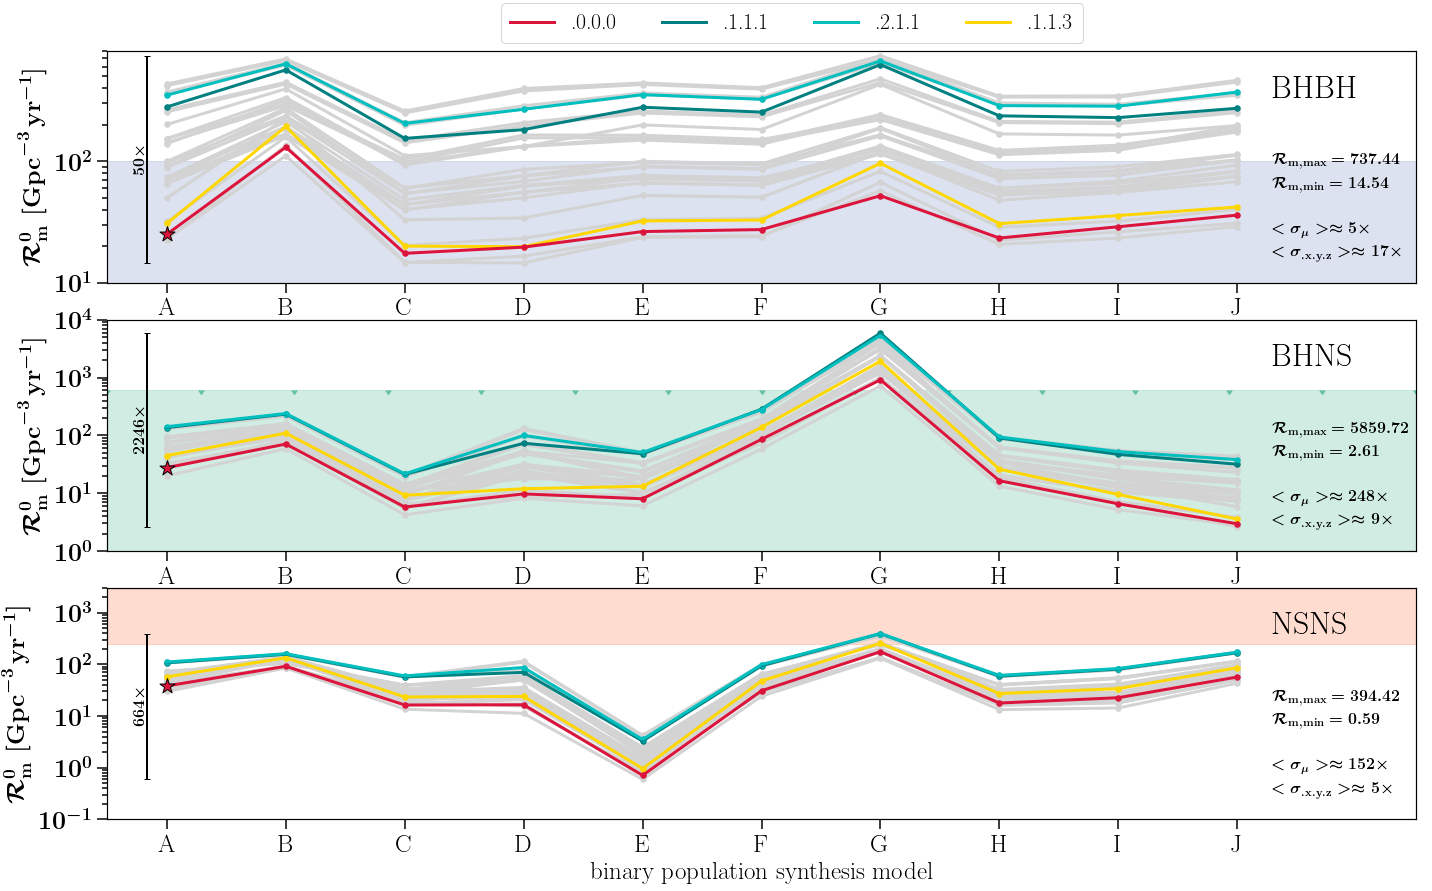

In [182]:



ylims =[[10,800],[1,10000],[0.1,3000]]
plotRatesMSSFRandModelsAnalysis(whichRate='intrinsic')

('the observed fiducial rate =', 209.921099438389)
mean scatter per MSSFR:
2.7682573623022173
mean scatter per BPS:
44.4006161552907
('the observed fiducial rate =', 6.564267050899459)
mean scatter per MSSFR:
16.36175823409918
mean scatter per BPS:
9.649741617701471
('the observed fiducial rate =', 1.0859067433622287)
mean scatter per MSSFR:
53.42715321201184
mean scatter per BPS:
5.759337796165573


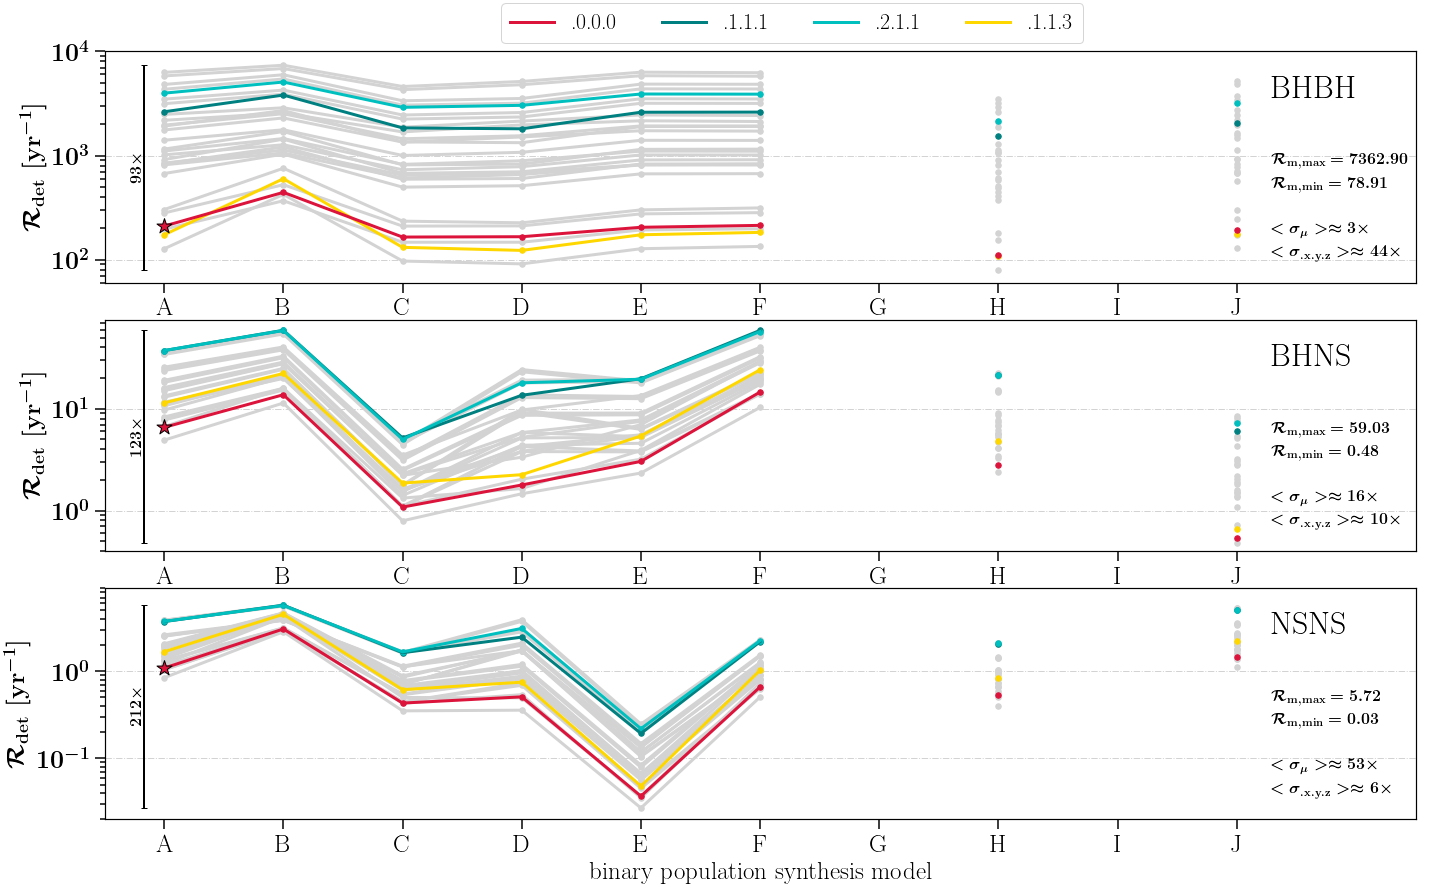

In [51]:

ylims = [[60, 1E4], [0.4, 75], [0.02, 9]]
plotRatesMSSFRandModelsAnalysis(whichRate='observed')

In [134]:
print(MSSFRnameslist)

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']


In [4]:
MSSFRnameslistCSV = []
MSSFRnameslistCSV.append('.0.0.0') # add phenomenological 

for ind_GSMF, GSMF in enumerate(GSMFs):
    ind_y = ind_GSMF + 1
    for ind_MZ, MZ in enumerate(MZs):
        ind_z = ind_MZ +1
        for ind_SFR, SFR in enumerate(SFRs):
            ind_x = ind_SFR+1
            
            
            
            
        

            MSSFRnameslistCSV.append('.%s.%s.%s'%(ind_x, ind_y, ind_z))
# print(modelnameslistA)

# USE LINESTYLES

In [1153]:
def plotRatesMSSFRandModelsAnalysisLS(whichRate='intrinsic'):
    ncols=1
    nrows=3
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
#     nrDATAready = 12
    nModels=12
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    
    for ind_t, DCOtype in enumerate(Types):
        for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        
            # remove if statement once also created datafiles for BHBH ans NSNS
#             if (DCOtype == 'BHNS') or (DCOtype =='BBH'):
            stringgg = 'AllDCOsimulation'
            df_name = 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][0:nModels]
#                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
                
                
                




            elif whichRate=='observed':
                rates = rates_L[1::2][0:nModels]
                if ind_L==0:
                    print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'


            
            
            if ind_L==0:
                COLOR= TypeColours[ind_t]#  'crimson'
                zorder = 100
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[0]
                ALPHA=1
            elif ind_L in [20]: #[1]:
                COLOR=TypeColours[ind_t]#'teal'
                zorder=10
                label=MSSFRnameslist[ind_L] 
                ls = MSSFRlinestyles[1]
                ALPHA=1
            elif ind_L in [6]:#[2]:
                COLOR=TypeColours[ind_t]#'c'
                zorder=10
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[2]
                ALPHA=1
#             elif ind_L in [6]: #[7]:
#                 zorder=10
#                 COLOR=TypeColours[ind_t]#'gold'
#                 label=MSSFRnameslist[ind_L]
#                 ls = MSSFRlinestyles[3]
#                 ALPHA=1
            else:
                COLOR=TypeColours[ind_t]# 'lightgray' #MSSFRcolors[ind_L]
                zorder=2
                label=None    
                ls = MSSFRlinestyles[0]
                ALPHA=0.1
            
            axe[ind_t].plot(range(len(rates)), rates, c=COLOR, lw=3, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
            axe[ind_t].scatter(range(len(rates)), rates, c=COLOR, s=30, label=label, zorder=zorder, alpha=ALPHA, linestyle=ls)
            # plot fiducial result with a star
            if ind_L==0:
                axe[ind_t].scatter(range(len(rates))[0], rates[0],\
                                   c=COLOR, s=250, label=label, \
                                   zorder=1000, marker='*', edgecolor='black')
                

#         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
        # calculate statistics: 
        minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)

        print('mean scatter per MSSFR:')
        print((minMaxPerMSSFR[1] / minMaxPerMSSFR[0]))
        print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
        meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))
        
        print('mean scatter per BPS:')
#         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
        print(minMaxPerBPS[1]/minMaxPerBPS[0])
        print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
        meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
#         x = nrDATAready 
        textt_MSSFR = r'$\langle \sigma_{\rm{xyz}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
        textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
        minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])
        
        if whichRate=='intrinsic':
            textt_min = r'$\mathcal{R}^0_{\rm{m,min}} = %s $'%roundAndFormat(minn)
            textt_max = r'$\mathcal{R}^0_{\rm{m,max}} = %s $'%roundAndFormat(maxx)
        elif whichRate=='observed':
            textt_min = r'$\mathcal{R}_{\rm{det,min}} = %s $'%roundAndFormat(minn)
            textt_max = r'$\mathcal{R}_{\rm{det,max}} = %s $'%roundAndFormat(maxx)
        
        axe[ind_t].text(0.905, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
        axe[ind_t].text(0.905, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
                        
#         axe[ind_t].text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
#         axe[ind_t].text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
        
        
        ## MAKE RANGE ERROR LINE: 
        resN = 20
        scatterline_x = -0.25 * np.ones(resN)
        scatterline_y = np.linspace(minn,maxx, resN)
        axe[ind_t].errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
        textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
        yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
        axe[ind_t].text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

        
        axe[ind_t].text(-0.47, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t].transAxes)#, weight = 'bold')
        axe[ind_t].text(-0.47, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t].transAxes)#, weight = 'bold')
                
        
        
        xmin = -0.8
        xmax = nModels +0.5 # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)
        
        if whichRate=='intrinsic':
            min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
            max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
            axe[ind_t].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=0)
            
            # for BHNS plot that its a upper limit
            if ind_t==1:
                axe[ind_t].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)
            
        else:
            for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                axe[ind_t].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
            axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        

#         # make up axes
        if ind_t ==2:
            xlabel = r'binary population synthesis model $\mu$'
        else:
            xlabel=r'  $\_$ '
            
        axe[ind_t].set_xlim(xmin, xmax)
        axe[ind_t] == CV.layoutAxes(axe[ind_t], nameX=xlabel, nameY=ylabel)
        axe[ind_t].set_yscale('log')
    
         # Set the tick labels
#         if ind_t==2:
        axe[ind_t].set_xticks(range(nModels))
        axe[ind_t].set_xticklabels(BPSnameslist)
        
        axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        
        axe[ind_t].text(0.905, 0.8, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
    
        if ind_t==0: 
            handles, labels = axe[ind_t].get_legend_handles_labels()
#             mask = [0,1,2,7]
            mask=[0,20, 6]
#             labels=['000', '111', '211', '113']
            labels = ['000',  '231', '312']
            lgd = f.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
                     bbox_to_anchor=(.76, 1.04),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
    plt.savefig('./Rates_' +whichRate + '_AllDCO.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




In [1154]:
print(MSSFRnameslist)
print(MSSFRnameslist[6])
print(MSSFRnameslist[20])

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
312
231


('the intrinsic fiducial rate for ', 'BBH', '=', 69.71771793870406)
[ 0  1  2  3  4  5  6  7  8  9 10 11]
mean scatter per MSSFR:
[8.09251438 5.94825549 5.16043445 5.86248838 8.50158241 6.04802683
 8.32223306 9.42837685 7.4560921  9.05252768 5.00625306 4.40183479
 4.89159984 5.77643539 4.71806891 5.66803609 6.29909775 5.35477419
 6.17631573 5.02963358 4.44483825 4.91813343 5.52483323 4.57830305
 5.43886687 6.08844412 5.28708479 5.98907869]
6.052291548873007
mean scatter per BPS:
[20.50608307  9.09435164 19.52913413 20.16834906 18.89182453 16.3009113
 25.51087738 17.02768688 15.77481028 16.43279781 17.00099107 14.35813227]
17.549662451506915
('the intrinsic fiducial rate for ', 'BHNS', '=', 37.343646073393614)
[ 0  1  2  3  4  5  6  7  8  9 10 11]
mean scatter per MSSFR:
[75.51030561 19.57434062 15.7934822  18.47738854 49.86497061 27.10377474
 49.7803093  98.96696166 66.53370992 95.1352862  15.50608284 13.26535071
 14.77832586 24.16709119 17.12000764 23.24310199 34.47026017 23.84534446


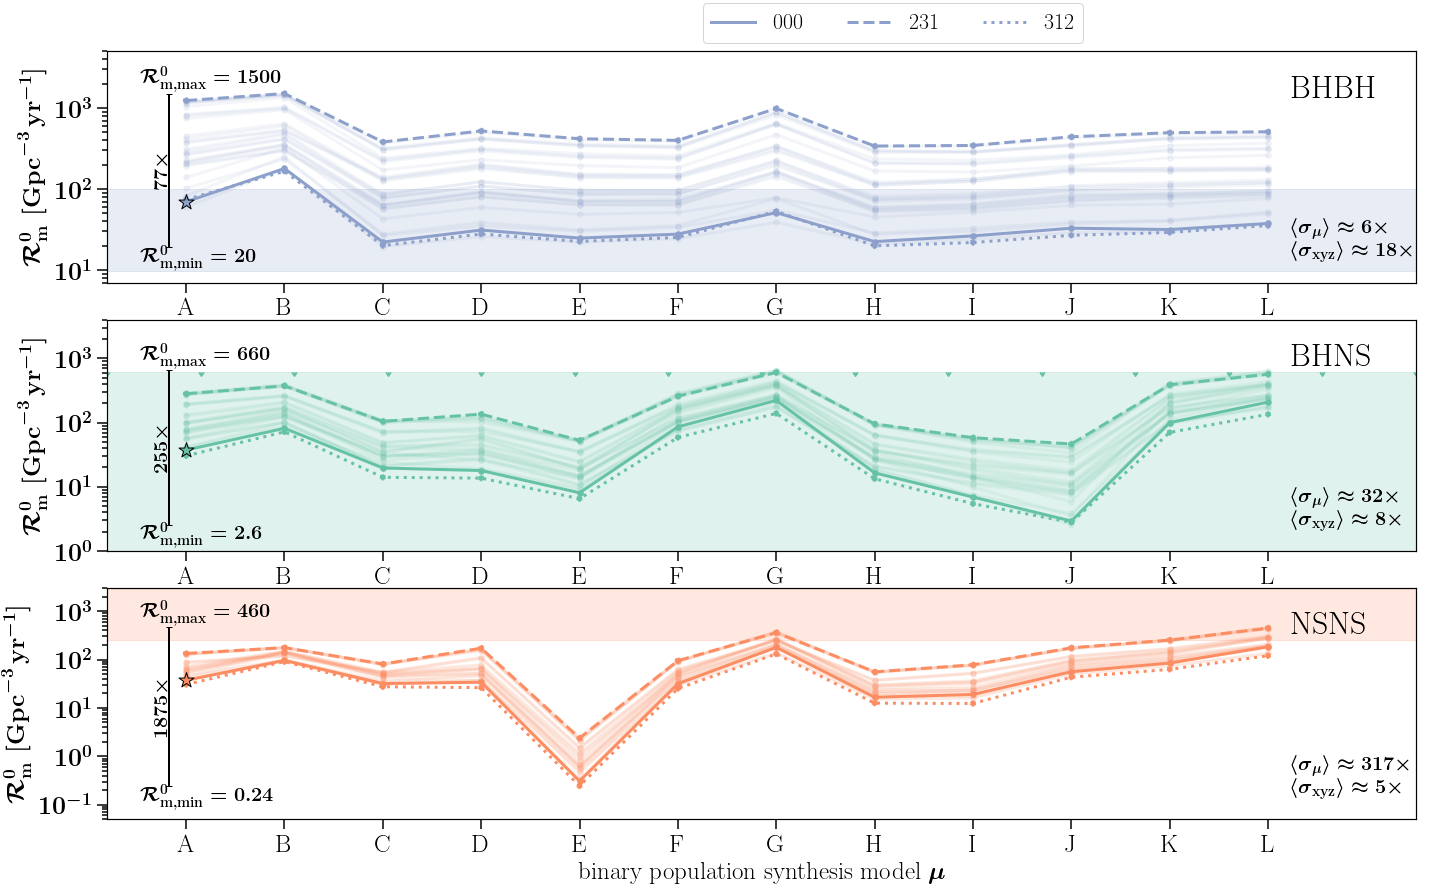

In [1155]:
ylims =[[7,5000],[1,4000],[0.05,3000]]
plotRatesMSSFRandModelsAnalysisLS(whichRate='intrinsic')

('the observed fiducial rate for ', 'BBH', '=', 577.8931078104057)
[ 0  1  2  3  4  5  6  7  8  9 10 11]
mean scatter per MSSFR:
[ 7.89100674  6.2986063   5.3808116   6.28134063  7.45353644  5.71007765
  7.61594349 10.32808265  9.12614253 10.18675138  4.31822174  4.19505036
  4.39060367  4.86195148  4.20750567  4.89014133  6.26500768  5.23578249
  6.26583715  4.1276611   3.97897078  4.11832329  4.10796368  4.09002902
  4.18687573  5.32375931  4.98037521  5.39614557]
5.757589452315627
mean scatter per BPS:
[26.93309883 17.06505222 48.79508181 48.99224912 49.15313491 46.80378486
 64.11114933 45.79546014 39.92469966 40.51163587 48.87533145 47.85212245]
43.73440005498119
('the observed fiducial rate for ', 'BHNS', '=', 9.331220849069377)
[ 0  1  2  3  4  5  6  7  8  9 10 11]
mean scatter per MSSFR:
[63.73190584 19.44829529 15.55969904 18.37792727 43.61950307 24.48039841
 43.77512981 85.662906   59.84618195 82.99930575 15.08116832 12.56811963
 14.35413338 21.8753331  15.37543191 21.14580026

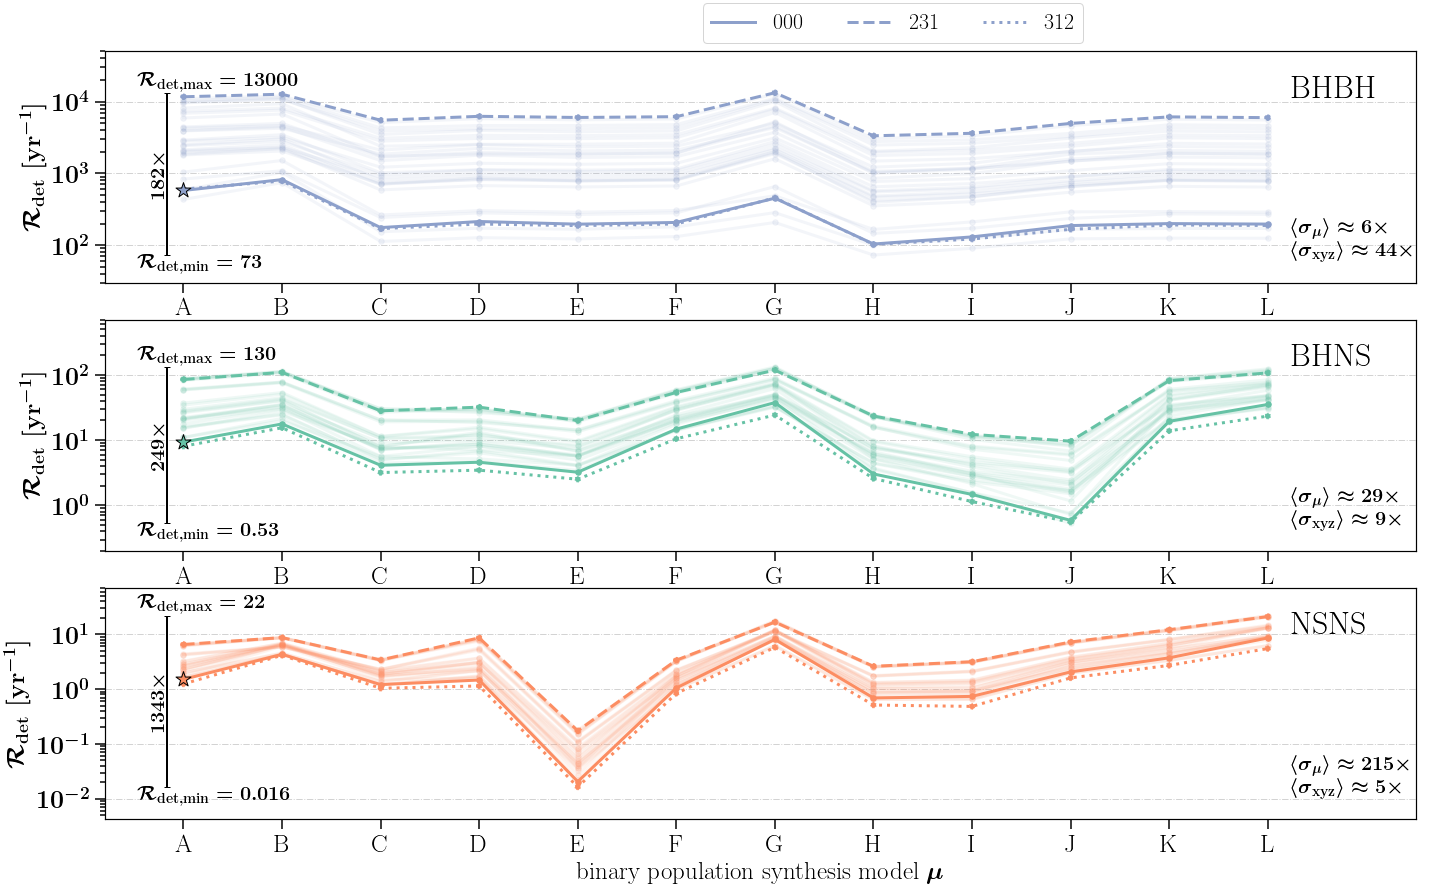

In [1156]:

ylims = [[30, 5E4], [0.2, 700], [0.0042, 70]]
plotRatesMSSFRandModelsAnalysisLS(whichRate='observed')

In [485]:
def plotRatesAnalysis(whichRate='intrinsic', whichXYZ='GSMF'):
    ncols=1
    nrows=3
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
#     nrDATAready = 12
    nModels=12
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    
    for ind_t, DCOtype in enumerate(Types):
        for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        
            # remove if statement once also created datafiles for BHBH ans NSNS
#             if (DCOtype == 'BHNS') or (DCOtype =='BBH'):
            stringgg = 'AllDCOsimulation'
            df_name = 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][0:nModels]
#                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
                
                
                



            elif whichRate=='observed':
                rates = rates_L[1::2][0:nModels]
                if ind_L==0:
                    print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'


            if whichXYZ=='MZR':
                List1 = [1,2,3,10,11,12,19,20,21]
                List2 = [4,5,6,13,14,15,22,23,24]
                List3 = [7,8,9,16,17,18,25,26,27]

            if whichXYZ=='GSMF':
                List1 = np.asarray(range(9))+1
                List2 = np.asarray(range(9))+10
                List3 = np.asarray(range(9))+19                
                
            if whichXYZ=='SFR':
                List1 = range(28)[1::3]
                List2 = range(28)[2::3]
                List3 = range(28)[3::3]                

             
                
                
            # FIDUCIAL 
            if ind_L==0:
                COLOR= 'k'#TypeColours[0]#  'crimson'
                zorder = 100
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[0]
                ALPHA=1
            elif ind_L in (List1):
                COLOR='crimson'
                zorder = 100
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[0]
                
            
            elif ind_L in List2:
                COLOR='gold'
                zorder=10
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[0]
                
            elif ind_L in List3:
                COLOR='teal'
                zorder=10
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[0]

            
            axe[ind_t].plot(range(len(rates)), rates, c=COLOR, lw=3, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
            axe[ind_t].scatter(range(len(rates)), rates, c=COLOR, s=30, label=label, zorder=zorder, alpha=ALPHA, linestyle=ls)
            # plot fiducial result with a star
            if ind_L==0:
                axe[ind_t].scatter(range(len(rates))[0], rates[0],\
                                   c=COLOR, s=250, label=label, \
                                   zorder=1000, marker='*', edgecolor='black')
                


        
        xmin = -0.6
        xmax = nModels +0.5 # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)
        
        if whichRate=='intrinsic':
            min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
            max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
            axe[ind_t].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=0)
            
            # for BHNS plot that its a upper limit
            if ind_t==1:
                axe[ind_t].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)
            
        else:
            for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                axe[ind_t].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
            axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        

#         # make up axes
        if ind_t ==2:
            xlabel = r'binary population synthesis model $\mu$'
        else:
            xlabel=r'  $\_$ '
            
        axe[ind_t].set_xlim(xmin, xmax)
        axe[ind_t] == CV.layoutAxes(axe[ind_t], nameX=xlabel, nameY=ylabel)
        axe[ind_t].set_yscale('log')
    
         # Set the tick labels
#         if ind_t==2:
        axe[ind_t].set_xticks(range(nModels))
        axe[ind_t].set_xticklabels(BPSnameslist)
        
        axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        
        axe[ind_t].text(0.905, 0.8, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
        
        

        if ind_t==0: 
            handles, labels = axe[ind_t].get_legend_handles_labels()
#             mask = [0,1,2,7]
#             labels=['000', '111', '211', '113']
            if whichXYZ=='SFR':
                mask = [0,1,2,3]
                labels = ["000", "1yz", '2yz', '3yz']
                lgd = f.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
                         bbox_to_anchor=(.76, 1.04),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

                
            elif whichXYZ=='GSMF':
                mask = [0,1,10,19]
                labels = ["000", "x1z", 'x2z', 'x3z']
                lgd = f.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
                         bbox_to_anchor=(.76, 1.04),  markerscale=2., scatterpoints=1) # loc = 'upper center')                 
                
            elif whichXYZ=='MZR':
                mask = [0,1,4,7]
                labels = ["000", "xy1", 'xy2', 'xy3']
                lgd = f.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
                         bbox_to_anchor=(.76, 1.04),  markerscale=2., scatterpoints=1) # loc = 'upper center')                 
                                
            else:
                lgd = f.legend(np.asarray(handles), np.asarray(labels), fontsize=fs-2, ncol=9,\
                         bbox_to_anchor=(.76, 1.04),  markerscale=2., scatterpoints=1) # loc = 'upper center')        
            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
    plt.savefig('./Rates_' +whichRate + '_' + whichXYZ +  '_.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return








('the observed fiducial rate for ', 'BBH', '=', 577.8931078104057)
('the observed fiducial rate for ', 'BHNS', '=', 9.331220849069377)
('the observed fiducial rate for ', 'BNS', '=', 1.5057808340382992)


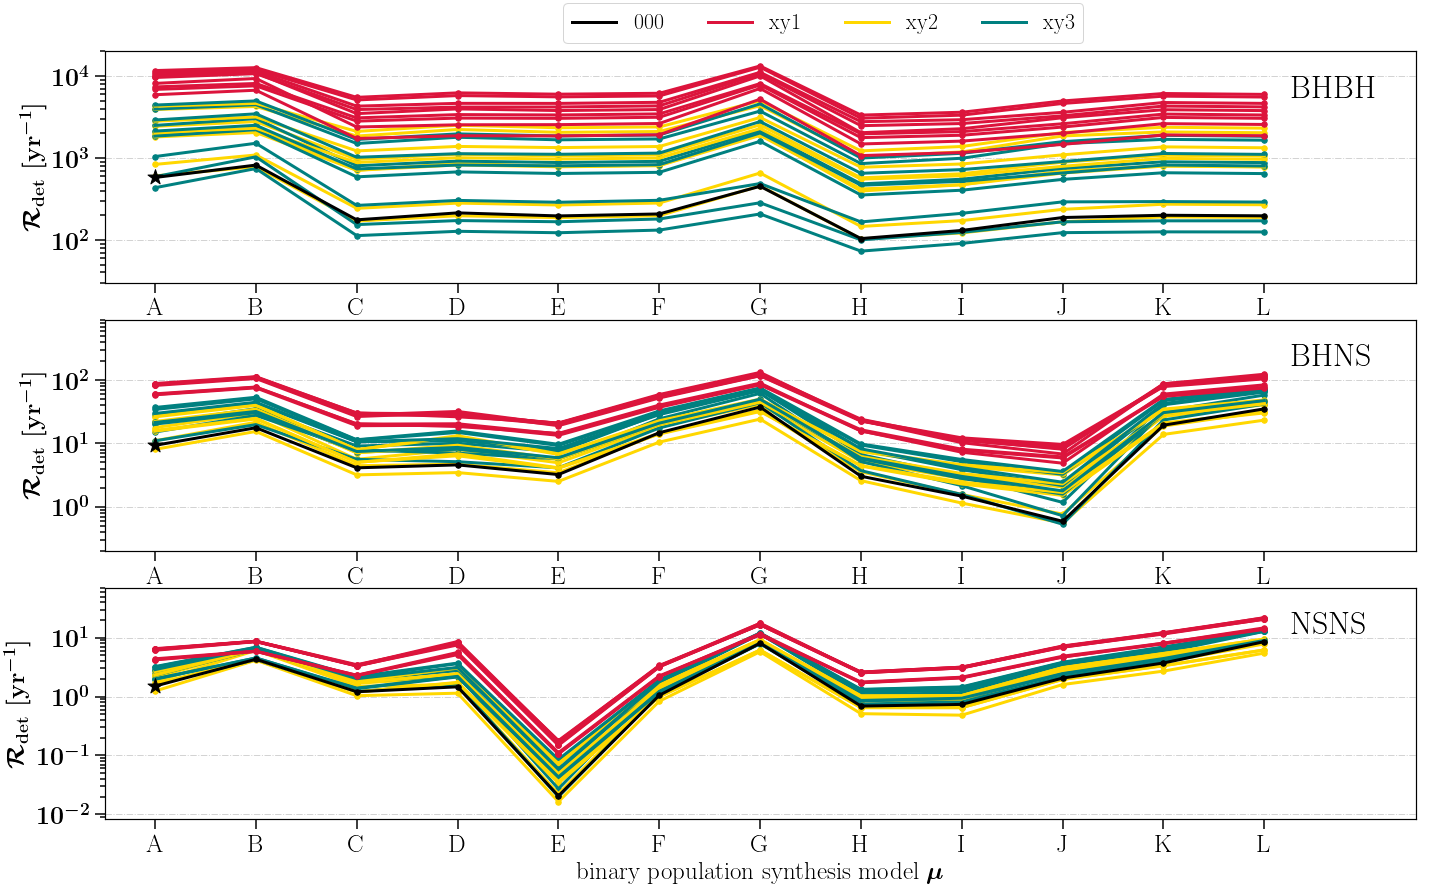

In [486]:
ylims = [[30, 2E4], [0.2, 900], [0.0082, 70]]

plotRatesAnalysis(whichRate='observed', whichXYZ='MZR')

('the intrinsic fiducial rate for ', 'BBH', '=', 69.71771793870406)
('the intrinsic fiducial rate for ', 'BHNS', '=', 37.343646073393614)
('the intrinsic fiducial rate for ', 'BNS', '=', 37.23775540786914)


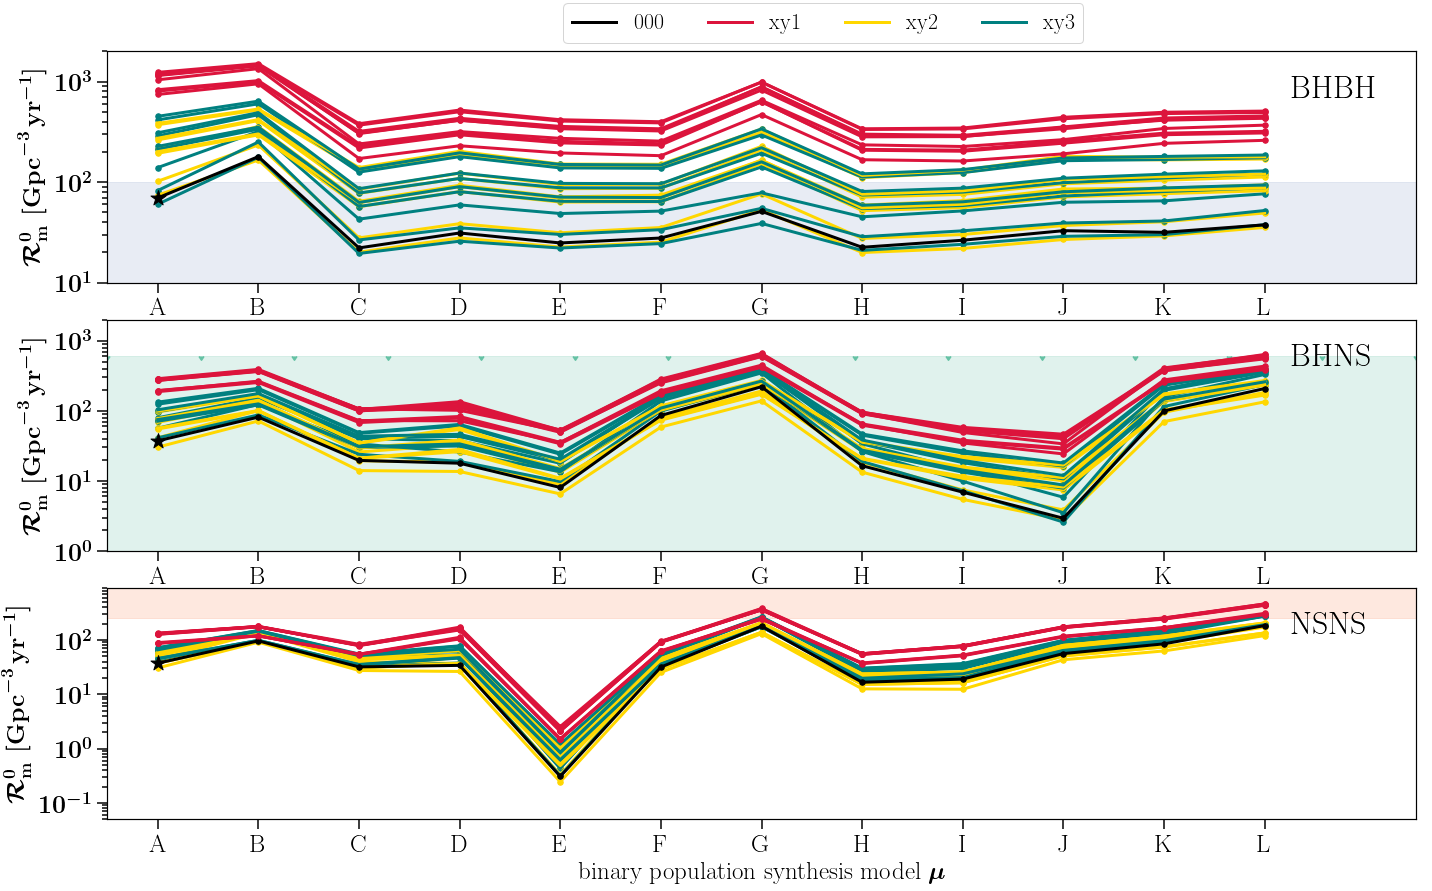

In [500]:
ylims =[[10,2000],[1,2000],[0.05,900]]

plotRatesAnalysis(whichRate='intrinsic', whichXYZ='MZR')

('the observed fiducial rate for ', 'BBH', '=', 577.8931078104057)
('the observed fiducial rate for ', 'BHNS', '=', 9.331220849069377)
('the observed fiducial rate for ', 'BNS', '=', 1.5057808340382992)


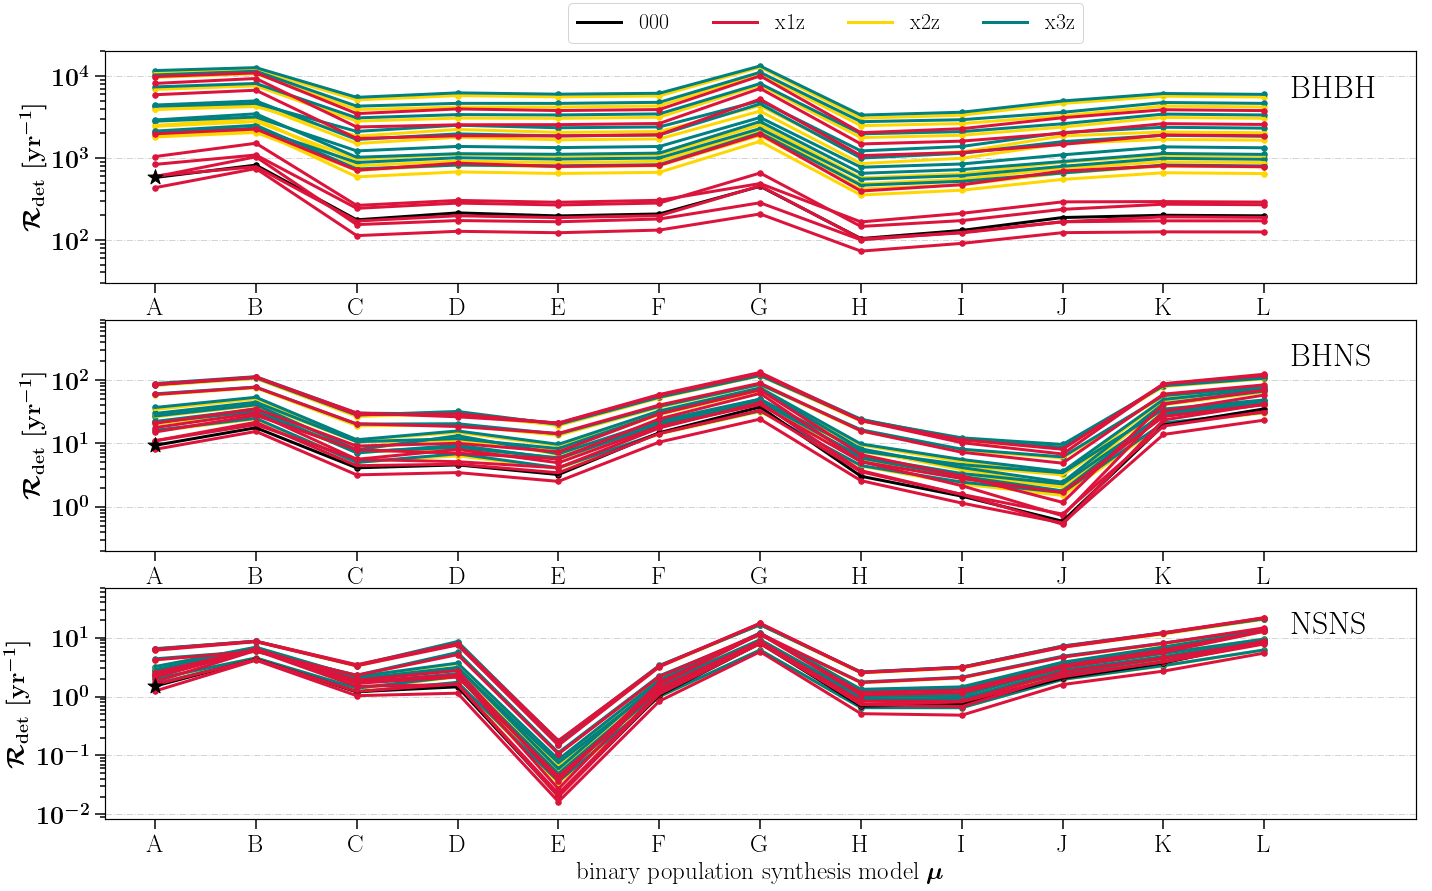

In [488]:
ylims = [[30, 2E4], [0.2, 900], [0.0082, 70]]

plotRatesAnalysis(whichRate='observed', whichXYZ='GSMF')

('the intrinsic fiducial rate for ', 'BBH', '=', 69.71771793870406)
('the intrinsic fiducial rate for ', 'BHNS', '=', 37.343646073393614)
('the intrinsic fiducial rate for ', 'BNS', '=', 37.23775540786914)


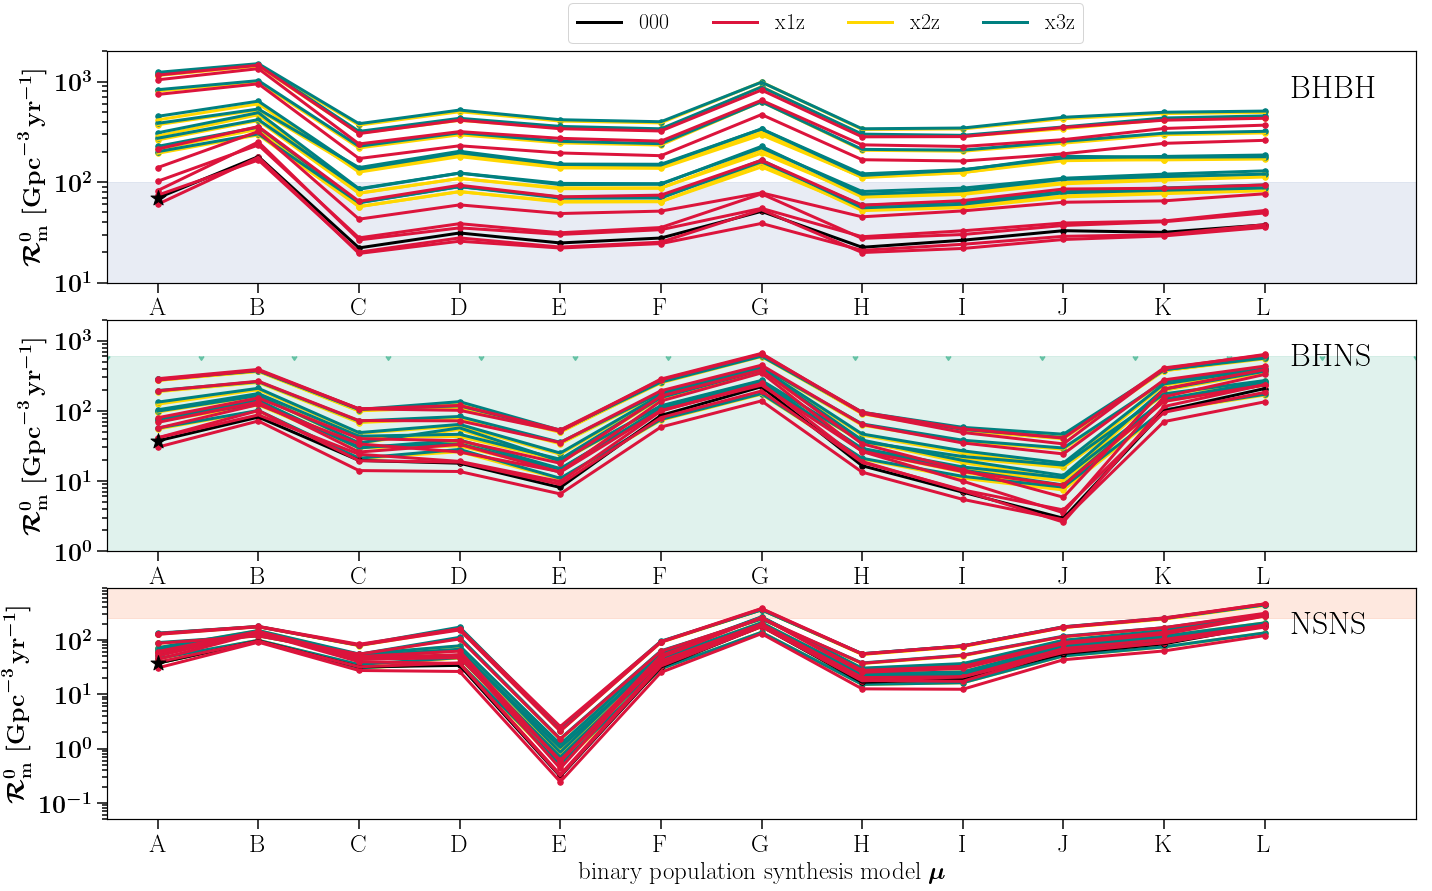

In [502]:
ylims =[[10,2000],[1,2000],[0.05,900]]

plotRatesAnalysis(whichRate='intrinsic', whichXYZ='GSMF')

# SFR 

('the observed fiducial rate for ', 'BBH', '=', 577.8931078104057)
('the observed fiducial rate for ', 'BHNS', '=', 9.331220849069377)
('the observed fiducial rate for ', 'BNS', '=', 1.5057808340382992)


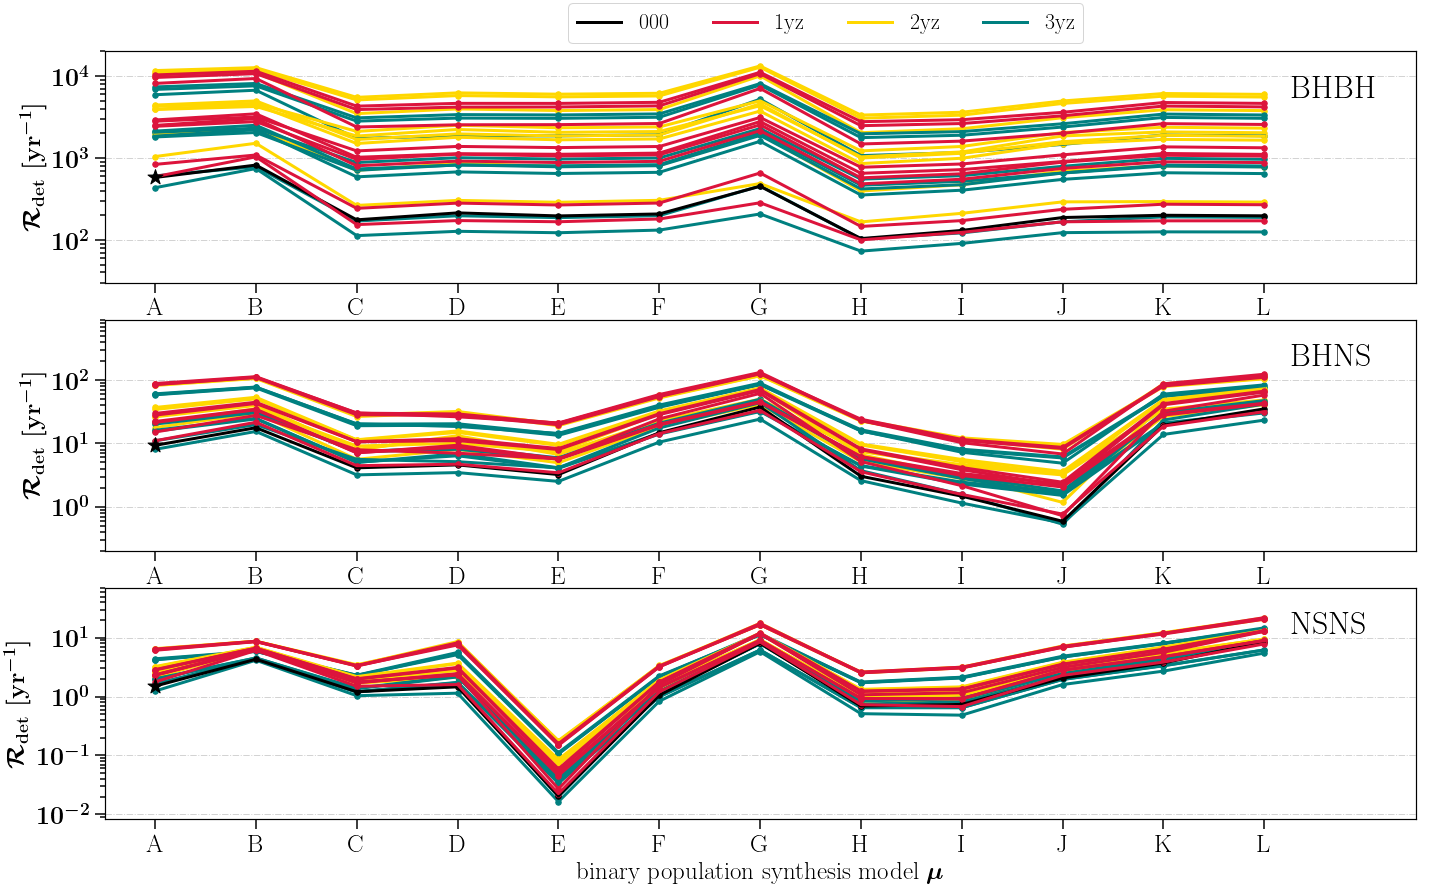

In [503]:
ylims = [[30, 2E4], [0.2, 900], [0.0082, 70]]

plotRatesAnalysis(whichRate='observed', whichXYZ='SFR')

('the intrinsic fiducial rate for ', 'BBH', '=', 69.71771793870406)
('the intrinsic fiducial rate for ', 'BHNS', '=', 37.343646073393614)
('the intrinsic fiducial rate for ', 'BNS', '=', 37.23775540786914)


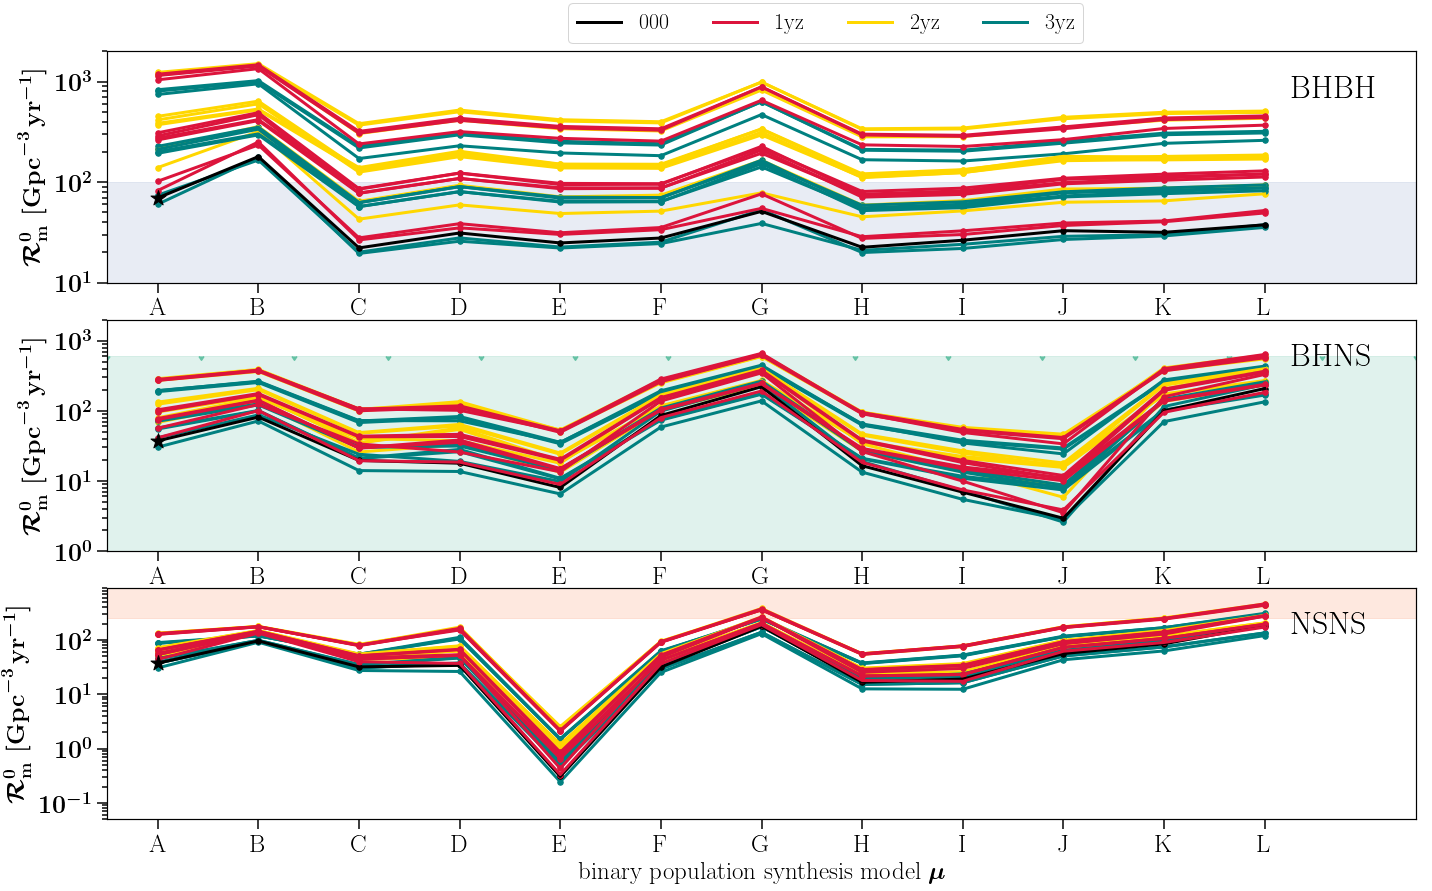

In [505]:
ylims =[[10,2000],[1,2000],[0.05,900]]

plotRatesAnalysis(whichRate='intrinsic', whichXYZ='SFR')

In [143]:
print(MSSFRnameslist)


# Same SFR: 
# [1,4,7,10,13,16,19,22,25]

# print(range(28)[1::3])
# print(range(28)[2::3])
# print(range(28)[3::3])


# SAME GSMF:
[1,2,3,4,5,6,7,8,9]
print(np.asarray(range(9))+1)
print(np.asarray(range(9))+10)
print(np.asarray(range(9))+19)



# SAME MZR:
[1,2,3,10,11,12,19,20,21]
[4,5,6,13,14,15,22,23,24]
[7,8,9,16,17,18,25,26,27]

['.0.0.0', '.1.1.1', '.2.1.1', '.3.1.1', '.1.1.2', '.2.1.2', '.3.1.2', '.1.1.3', '.2.1.3', '.3.1.3', '.1.2.1', '.2.2.1', '.3.2.1', '.1.2.2', '.2.2.2', '.3.2.2', '.1.2.3', '.2.2.3', '.3.2.3', '.1.3.1', '.2.3.1', '.3.3.1', '.1.3.2', '.2.3.2', '.3.3.2', '.1.3.3', '.2.3.3', '.3.3.3']
[1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18]
[19 20 21 22 23 24 25 26 27]


[7, 8, 9, 16, 17, 18, 25, 26, 27]

In [ ]:






# def plotRatesMSSFRandModelsAnalysis(whichRate='intrinsic'):
#     ncols=1
#     nrows=3
#     f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,12), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
#     Types      = ['BBH', 'BHNS', 'BNS']
#     TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
#     TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
#     ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    
#     MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
#     nrDATAready = 10
#     nModels=10
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]
#     for ind_t, DCOtype in enumerate(Types):
#         for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        
#             # remove if statement once also created datafiles for BHBH ans NSNS
# #             if (DCOtype == 'BHNS') or (DCOtype =='BBH'):
#             df_name = 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '.csv' 
#             df = pd.read_csv('rates_MSSFR_Models_' + TypesLabels[ind_t]+'.csv', index_col=0).T
#             rates_L = df[MSSFRname]

#             if whichRate =='intrinsic':
#                 rates = rates_L[::2]
# #                     print(rates)
#                 if ind_L==0:
#                     print('the intrinsic fiducial rate =',rates[0]) 

#                 ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'

#             elif whichRate=='observed':
#                 rates = rates_L[1::2]
#                 if ind_L==0:
#                     print('the observed fiducial rate =',rates[0]) 
#                 ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'


         


#             if ind_L in ([1,2,3,10,11,12,19,20,21]):
#                 COLOR='crimson'
#                 zorder = 100
#                 label=MSSFRnameslist[ind_L]
                
            
#             elif ind_L in [4,5,6,13,14,15,22,23,24]:
#                 COLOR='gold'
#                 zorder=10
#                 label=MSSFRnameslist[ind_L]
#             elif ind_L in [7,8,9,16,17,18,25,26,27]:
#                 COLOR='c'
#                 zorder=10
#                 label=MSSFRnameslist[ind_L]
# #             elif ind_L in [7, 8, 9, 16,17,18, 25, 26, 27]:
# #                 zorder=10
# #                 COLOR='gold'
# #                 label=MSSFRnameslist[ind_L]
# #             elif ind_L in [4,5,6, 13, 14, 15, 22, 23, 24]:
# #                 zorder=10
# #                 COLOR='green'
# #                 label=MSSFRnameslist[ind_L]
#             else:
#                 COLOR= 'lightgray'
#                 zorder=2
#                 label=None            
            
#             axe[ind_t].plot(range(len(rates)), rates, c=COLOR, lw=3, label=None, zorder=zorder)
#             axe[ind_t].scatter(range(len(rates)), rates, c=COLOR, s=30, label=label, zorder=zorder)
                
# #             else:
# #                 ylabel = 'TBD'
                
        
#         xmin = -0.6
#         xmax = nrDATAready -0.5 # change to len(df.T)
#         xx = np.linspace(xmin,xmax,10)
        
#         if whichRate=='intrinsic':
#             min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
#             max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
#             axe[ind_t].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.3, color=TypeColours[ind_t], zorder=0)
#         else:
#             for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
#                 axe[ind_t].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
#             axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        
        
# #         # make up axes
#         xlabel = 'model'
#         axe[ind_t].set_xlim(xmin, xmax)
#         axe[ind_t] == CV.layoutAxes(axe[ind_t], nameX=xlabel, nameY=ylabel)
#         axe[ind_t].set_yscale('log')
    
#          # Set the tick labels
#         axe[ind_t].set_xticks(range(nModels))
#         axe[ind_t].set_xticklabels(BPSnameslist)
        
        
#         axe[ind_t].text(0.9, 0.1, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
    
#         if ind_t==0: 
#             handles, labels = axe[ind_t].get_legend_handles_labels()
# #             mask = [0,1,2,7,8, 9, 16,17,18, 25, 26, 27]
# #             mask=[:28]
#             lgd = f.legend(np.asarray(handles)[:28], np.asarray(labels)[:28], fontsize=fs-8, ncol=9,\
#                      bbox_to_anchor=(.72, 1.04),  markerscale=2., scatterpoints=1) # loc = 'upper center')        
        
#     plt.tight_layout()
#     plt.subplots_adjust(wspace=0.34, hspace=0.2)
#     plt.savefig('./Rates_' +whichRate + '_analysis_MZR.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
#     plt.show()

#     plt.close()

#     return


In [ ]:
For presentation:

In [320]:
# def plotRatesMSSFRandModelsAnalysis(whichRate='intrinsic'):
#     ncols=1
#     nrows=3
#     f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,12), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
#     Types      = ['BBH', 'BHNS', 'BNS']
#     TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
#     TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
#     ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    
#     MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
#     nrDATAready = 10
#     nModels=10
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]
#     for ind_t, DCOtype in enumerate(Types):
#         for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        
#             # remove if statement once also created datafiles for BHBH ans NSNS
# #             if (DCOtype == 'BHNS') or (DCOtype =='BBH'):
#             df_name = 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '.csv' 
#             df = pd.read_csv('rates_MSSFR_Models_' + TypesLabels[ind_t]+'.csv', index_col=0).T
#             rates_L = df[MSSFRname]

#             if whichRate =='intrinsic':
#                 rates = rates_L[::2]
# #                     print(rates)
#                 if ind_L==0:
#                     print('the intrinsic fiducial rate =',rates[0]) 

#                 ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
                
                
                




#             elif whichRate=='observed':
#                 rates = rates_L[1::2]
#                 if ind_L==0:
#                     print('the observed fiducial rate =',rates[0]) 
#                 ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'


            
            
#             if ind_L==0:
#                 COLOR='crimson'
#                 zorder = 100
#                 label=MSSFRnameslist[ind_L]
#             elif ind_L in [1]:
#                 COLOR='teal'
#                 zorder=10
#                 label=MSSFRnameslist[ind_L]
#             elif ind_L in [2]:
#                 COLOR='c'
#                 zorder=10
#                 label=MSSFRnameslist[ind_L]
#             elif ind_L in [7]:
#                 zorder=10
#                 COLOR='gold'
#                 label=MSSFRnameslist[ind_L]
#             else:
#                 COLOR= 'lightgray' #MSSFRcolors[ind_L]
#                 zorder=2
#                 label=None            
            
#             axe[ind_t].plot(range(len(rates)), rates, c=COLOR, lw=3, label=None, zorder=zorder)
#             axe[ind_t].scatter(range(len(rates)), rates, c=COLOR, s=30, label=label, zorder=zorder)
#             # plot fiducial result with a star
#             if ind_L==0:
#                 axe[ind_t].scatter(range(len(rates))[0], rates[0],\
#                                    c=COLOR, s=250, label=label, \
#                                    zorder=1000, marker='*', edgecolor='black')
                

# #         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
#         # calculate statistics: 
#         minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t)

#         print('mean scatter per MSSFR:')
#         print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
#         meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))
        
#         print('mean scatter per BPS:')
# #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
#         print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
#         meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# #         x = nrDATAready 
#         textt_MSSFR = r'$\langle \sigma_{\rm{.x.y.z}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
#         textt_BPS = r'$\langle \sigma_{\rm{m}}\rangle \approx %s \times$'%meanScatterDueToBPS
        
#         axe[ind_t].text(0.89, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
#         axe[ind_t].text(0.89, 0.21, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
                        
    
        
#         xmin = -0.6
#         xmax = nrDATAready +0.5 # change to len(df.T)
#         xx = np.linspace(xmin,xmax,10)
        
#         if whichRate=='intrinsic':
#             min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
#             max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
#             axe[ind_t].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.3, color=TypeColours[ind_t], zorder=0)
#         else:
#             for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
#                 axe[ind_t].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
#             axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        

# #         # make up axes
#         if ind_t ==2:
#             xlabel = 'binary population synthesis model'
#         else:
#             xlabel=r'  $\_$ '
            
#         axe[ind_t].set_xlim(xmin, xmax)
#         axe[ind_t] == CV.layoutAxes(axe[ind_t], nameX=xlabel, nameY=ylabel)
#         axe[ind_t].set_yscale('log')
    
#          # Set the tick labels
# #         if ind_t==2:
#         axe[ind_t].set_xticks(range(nModels))
#         axe[ind_t].set_xticklabels(BPSnameslist)
        
#         axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        
#         axe[ind_t].text(0.11, 0.1, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
    
#         if ind_t==0: 
#             handles, labels = axe[ind_t].get_legend_handles_labels()
#             mask = [0,1,2,7]
            
#             lgd = f.legend(np.asarray(handles)[mask], np.asarray(labels)[mask], fontsize=fs-2, ncol=9,\
#                      bbox_to_anchor=(.76, 1.04),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

            
#     plt.tight_layout()
#     plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
#     plt.savefig('./Rates_' +whichRate + '_analysisFiducialMSSFR_2.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
#     plt.show()

#     plt.close()

#     return




In [606]:
def plotRatesMSSFRandModelsRatios(whichRate='intrinsic'):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    nrDATAready = 12
    nModels=12
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100
    
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_t, DCOtype in enumerate(Types):

            stringgg = 'AllDCOsimulation'
            df_name = 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][:nModels]
    #                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate =',rates[0]) 

                ylabel =   r'$\mathcal{R}_{\rm{m}}^{{0}}  (100 / \mathcal{R}_{\rm{m}}^{{0, \rm{BHBH}}})$'  # r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'


            elif whichRate=='observed':
                rates = rates_L[1::2][:nModels]
                if ind_L==0:
                    print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$ \mathcal{R}_{\rm{det}}   (100 /\mathcal{R}_{\rm{det}}^{{\rm{BHBH}}})$'  #  r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'



            if DCOtype=='BBH':
                rates_BBH = rates
            elif DCOtype=='BHNS':
                rates_BHNS = rates
            elif DCOtype=='BNS':
                rates_BNS = rates
                
            
        # normalize s.t. BBH is always 100
#         print(rates_BBH)
        rates_BHNS = rates_BHNS * (100./rates_BBH)
        rates_BNS = rates_BNS * (100./rates_BBH)
        if ind_L==0:
            print('fiducial BHNS ratio = ', rates_BHNS[0])
            print('fiducial NSNS ratio = ', rates_BNS[0])
            print('per 50 BHBHs:')
            print('fiducial BHNS ratio = ', rates_BHNS[0]/2)
            print('fiducial NSNS ratio = ', rates_BNS[0]/2)
        
        maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
        maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
        minRatio_BHNS = np.min(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
        minRatio_BNS  = np.min(np.concatenate(([maxRatio_BNS], rates_BNS)))
            
        if ind_L==0:
            COLOR='crimson'
            zorder = 100
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[0]
            ALPHA=1
        elif ind_L in [20]:#[1]:
            COLOR='teal'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls=MSSFRlinestyles[1]
            ALPHA=1
        elif ind_L in [6]: #[2]:
            COLOR='c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
#         elif ind_L in [7]:
#             zorder=10
#             COLOR='gold'
#             label=MSSFRnameslist[ind_L]
#             ls = MSSFRlinestyles[3]
#             ALPHA=1
        else:
            COLOR= 'lightgray' #MSSFRcolors[ind_L]
            zorder=2
            label=None      
            ls = MSSFRlinestyles[0]
            ALPHA=0.1
            
            
        rates_BBH = (rates_BBH / rates_BBH)    * 100 
        axe.plot(range(len(rates)), rates_BBH, c=TypeColours[0], lw=3, zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BBH, c=TypeColours[0], s=30,  zorder=zorder, alpha=ALPHA) 
            
        axe.plot(range(len(rates)), rates_BNS, c=TypeColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BNS, c=TypeColours[2], s=30,  zorder=zorder, alpha=ALPHA) 
        
        axe.plot(range(len(rates)), rates_BHNS, c=TypeColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BHNS, c=TypeColours[1], s=30, zorder=zorder, alpha=ALPHA)
        
        axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)

        # plot fiducial result with a star
        if ind_L==0:
            axe.scatter(range(len(rates))[0], rates_BBH[0],\
                               c=TypeColours[0], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
                
            axe.scatter(range(len(rates))[0], rates_BHNS[0],\
                               c=TypeColours[1], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            axe.scatter(range(len(rates))[0], rates_BNS[0],\
                               c=TypeColours[2], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            
            
            
            
        
            
#         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
    # calculate statistics: 
#     minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t)

#     print('mean scatter per MSSFR:')
#     print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
#     meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

#     print('mean scatter per BPS:')
# #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
#     print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
#     meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# #         x = nrDATAready 
#     textt_MSSFR = r'$\langle \sigma_{\rm{.x.y.z}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
#     textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
#     minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])

#     textt_min = r'$\mathcal{R}_{\rm{m,min}} = %.2f $'%minn
#     textt_max = r'$\mathcal{R}_{\rm{m,max}} = %.2f $'%maxx

#     axe.text(0.89, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     axe.text(0.89, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

#     axe.text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     axe.text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

#     minnBHNS, maxxBHNS = minRatio_BHNS, maxRatio_BHNS
    minn, maxx = minRatio_BHNS, maxRatio_BHNS
    
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor=TypeColours[1], elinewidth=2)
    textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
    yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color=TypeColours[1], ha='right', va='center')

    
    minn, maxx = minRatio_BNS, maxRatio_BNS
    
    resN = 20
#     scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.37, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor=TypeColours[2], elinewidth=2)
    textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
    yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    axe.text(-0.37, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color=TypeColours[2], ha='right', va='center')
    
    
    
    
    xmin = -1
    xmax = nrDATAready +0.5 # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)

    if whichRate=='intrinsic':
        min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
        max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
#         axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.3, color=TypeColours[ind_t], zorder=0)

        # for BHNS plot that its a upper limit
        if ind_t==1:
            axe.scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)

    else:
        for ll in [0.01, 0.1, 1, 10, 100]: #, 1000, 1E4]:
            axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        
        O3nrs = np.asarray([37., 5., 6.])
        
        for ind_O3, rate_O3 in enumerate(O3nrs):
            print('getting here')
            axe.scatter(-0.5, rate_O3*(100./O3nrs[0]), color=TypeColours[ind_O3], s=200, marker='p')
            axe.text(-0.65, 200, 'O3 rates  scaled ' , rotation = 90, fontsize = fs-4, color = 'k', ha = 'right', va='top')#, weight = 'bold')
#             axe.errorbar(-0.25, rate_O3*(100/O3nrs[0]), yerr=np.sqrt(rate_O3)*(100/O3nrs[0]), color=TypeColours[ind_O3], elinewidth=3.5)
        
    
#         axe.scatter(np.asarray(range(len(rates)))*1000, rates_BHNS, c='k', s=30, label=label, zorder=zorder, alpha=ALPHA)  
#         # make up axes
    if ind_t ==2:
        xlabel = r'binary population synthesis model $\mu$'
    else:
        xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
    axe.set_yscale('log')


    axe.set_xticks(range(nModels))
    axe.set_xticklabels(BPSnameslist)

    axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

    axe.text(0.9, 0.4, 'relative \n rates  ' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    if whichRate=='observed':
        axe.text(0.89, 0.82, r'$R_{\rm{det}}^{\rm{BHBH}}=100$ ' , rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    else: 
        axe.text(0.89, 0.82, r'$R_{\rm{m}}^{\rm{0,BHBH}}=100$ ' , rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
# 
    # 

    handles, labels = axe.get_legend_handles_labels()
#     mask = [3,7,11,31]
#     [0,1,2,7]
#             mask = [0,1,2,7]
    mask=[3,83, 27]
#             labels=['000', '111', '211', '113']
    labels = ['000',  '231', '312']
    lgd = axe.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
             bbox_to_anchor=(.37, 1.31),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

    
    print('NSNS ratio in = [', minRatio_BNS, ' , ', maxRatio_BNS, ']')
    print('BHNS ratio in = [', minRatio_BHNS, ' , ', maxRatio_BHNS, ']')
    print('per 50 BHBHs:')
    print('NSNS ratio in = [', minRatio_BNS/2, ' , ', maxRatio_BNS/2, ']')
    print('BHNS ratio in = [', minRatio_BHNS/2, ' , ', maxRatio_BHNS/2, ']')    
    
    plt.tight_layout()
#     plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
    plt.savefig('./RatesRatios_' +whichRate + '.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




('the observed fiducial rate =', 577.8931078104057)
('the observed fiducial rate =', 9.331220849069377)
('the observed fiducial rate =', 1.5057808340382992)
('fiducial BHNS ratio = ', 1.6146966840329144)
('fiducial NSNS ratio = ', 0.26056390250847455)
per 50 BHBHs:
('fiducial BHNS ratio = ', 0.8073483420164572)
('fiducial NSNS ratio = ', 0.13028195125423728)
getting here
getting here
getting here
('NSNS ratio in = [', 0.005370404325563631, ' , ', 7.519786039894638, ']')
('BHNS ratio in = [', 0.2710670968103381, ' , ', 34.01452636615056, ']')
per 50 BHBHs:
('NSNS ratio in = [', 0.0026852021627818156, ' , ', 3.759893019947319, ']')
('BHNS ratio in = [', 0.13553354840516904, ' , ', 17.00726318307528, ']')


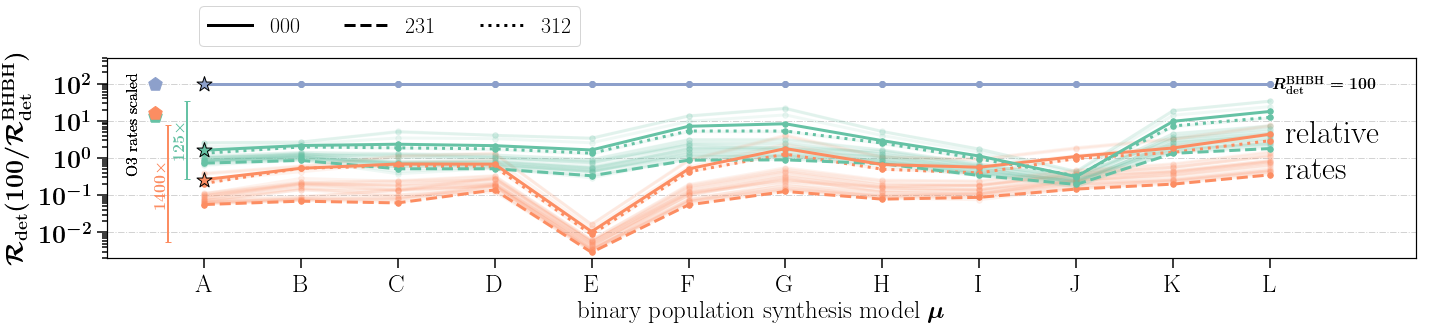

In [607]:

ylims = [[0.002, 200], [0.001, 200], [0.002, 500]]
plotRatesMSSFRandModelsRatios(whichRate='observed')

('the intrinsic fiducial rate =', 69.71771793870406)
('the intrinsic fiducial rate =', 37.343646073393614)
('the intrinsic fiducial rate =', 37.23775540786914)
('fiducial BHNS ratio = ', 53.56406832797685)
('fiducial NSNS ratio = ', 53.412183457594864)
per 50 BHBHs:
('fiducial BHNS ratio = ', 26.782034163988424)
('fiducial NSNS ratio = ', 26.706091728797432)
('NSNS ratio in = [', 0.8802168822174817, ' , ', 523.3621865937121, ']')
('BHNS ratio in = [', 10.892217432532998, ' , ', 633.9367912293371, ']')
per 50 BHBHs:
('NSNS ratio in = [', 0.44010844110874087, ' , ', 261.68109329685603, ']')
('BHNS ratio in = [', 5.446108716266499, ' , ', 316.96839561466857, ']')


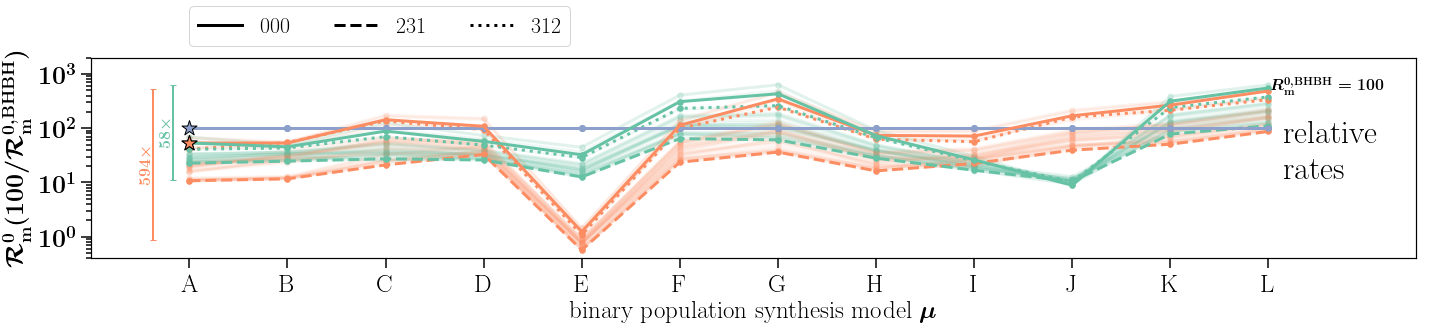

In [608]:

ylims = [[0.002, 200], [0.001, 200], [0.4, 2000]]
plotRatesMSSFRandModelsRatios(whichRate='intrinsic')

In [584]:
def plotRatesMSSFRandModelsRatiosToBHNS(whichRate='intrinsic'):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    nrDATAready = 12
    nModels=12
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    maxRatio_BBH = -100
    maxRatio_BNS = -100
    minRatio_BBH = 100
    minRatio_BNS = 100
    
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_t, DCOtype in enumerate(Types):

            stringgg = 'AllDCOsimulation'
            df_name = 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][:nModels]
    #                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate =',rates[0]) 

                ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'


            elif whichRate=='observed':
                rates = rates_L[1::2][:nModels]
                if ind_L==0:
                    print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'



            if DCOtype=='BBH':
                rates_BBH = rates
            elif DCOtype=='BHNS':
                rates_BHNS = rates
            elif DCOtype=='BNS':
                rates_BNS = rates
                
            
        # normalize s.t. BBH is always 100
#         print(rates_BBH)
        rates_BBH = rates_BBH * (100./rates_BHNS)
        rates_BNS = rates_BNS * (100./rates_BHNS)
        if ind_L==0:
            print('fiducial BHNS ratio = ', rates_BBH[0])
            print('fiducial NSNS ratio = ', rates_BNS[0])
            print('per 50 BHBHs:')
            print('fiducial BHNS ratio = ', rates_BBH[0]/2)
            print('fiducial NSNS ratio = ', rates_BNS[0]/2)
        
        maxRatio_BBH = np.max(np.concatenate(([maxRatio_BBH], rates_BBH)))
        maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
        minRatio_BBH = np.min(np.concatenate(([maxRatio_BBH], rates_BBH)))
        minRatio_BNS  = np.min(np.concatenate(([maxRatio_BNS], rates_BNS)))
            
        if ind_L==0:
            COLOR='crimson'
            zorder = 100
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[0]
            ALPHA=1
        elif ind_L in [20]:#[1]:
            COLOR='teal'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls=MSSFRlinestyles[1]
            ALPHA=1
        elif ind_L in [6]: #[2]:
            COLOR='c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
#         elif ind_L in [7]:
#             zorder=10
#             COLOR='gold'
#             label=MSSFRnameslist[ind_L]
#             ls = MSSFRlinestyles[3]
#             ALPHA=1
        else:
            COLOR= 'lightgray' #MSSFRcolors[ind_L]
            zorder=2
            label=None      
            ls = MSSFRlinestyles[0]
            ALPHA=0.1
            
            
        rates_BHNS = (rates_BHNS / rates_BHNS)    * 100 
        axe.plot(range(len(rates)), rates_BBH, c=TypeColours[0], lw=3, zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BBH, c=TypeColours[0], s=30,  zorder=zorder, alpha=ALPHA) 
            
        axe.plot(range(len(rates)), rates_BNS, c=TypeColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BNS, c=TypeColours[2], s=30,  zorder=zorder, alpha=ALPHA) 
        
        axe.plot(range(len(rates)), rates_BHNS, c=TypeColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BHNS, c=TypeColours[1], s=30, zorder=zorder, alpha=ALPHA)
        
        axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)

        # plot fiducial result with a star
        if ind_L==0:
            axe.scatter(range(len(rates))[0], rates_BBH[0],\
                               c=TypeColours[0], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
                
            axe.scatter(range(len(rates))[0], rates_BHNS[0],\
                               c=TypeColours[1], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            axe.scatter(range(len(rates))[0], rates_BNS[0],\
                               c=TypeColours[2], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            
            
            
            
        
            
#         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
    # calculate statistics: 
#     minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t)

#     print('mean scatter per MSSFR:')
#     print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
#     meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

#     print('mean scatter per BPS:')
# #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
#     print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
#     meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# #         x = nrDATAready 
#     textt_MSSFR = r'$\langle \sigma_{\rm{.x.y.z}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
#     textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
#     minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])

#     textt_min = r'$\mathcal{R}_{\rm{m,min}} = %.2f $'%minn
#     textt_max = r'$\mathcal{R}_{\rm{m,max}} = %.2f $'%maxx

#     axe.text(0.89, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     axe.text(0.89, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

#     axe.text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     axe.text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

#     minnBHNS, maxxBHNS = minRatio_BHNS, maxRatio_BHNS
    minn, maxx = minRatio_BBH, maxRatio_BBH
    
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor=TypeColours[0], elinewidth=2)
    textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
    yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color=TypeColours[0], ha='right', va='center')

    
    minn, maxx = minRatio_BNS, maxRatio_BNS
    
    resN = 20
#     scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.37, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor=TypeColours[2], elinewidth=2)
    textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
    yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    axe.text(-0.37, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color=TypeColours[2], ha='right', va='center')
    
    
    
    
    xmin = -0.75
    xmax = nrDATAready +0.5 # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)

    if whichRate=='intrinsic':
        min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
        max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
#         axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.3, color=TypeColours[ind_t], zorder=0)

        # for BHNS plot that its a upper limit
        if ind_t==1:
            axe.scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)

    else:
        for ll in [0.01, 0.1, 1, 10, 100]: #, 1000, 1E4]:
            axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        
        O3nrs = np.asarray([37., 5., 6.])
        
#         for ind_O3, rate_O3 in enumerate(O3nrs):
#             print('getting here')
#             axe.scatter(-0.5, rate_O3*(100./O3nrs[0]), color=TypeColours[ind_O3], s=200, marker='p')
#             axe.text(-0.65, 180, 'O3 rates \n  scaled ' , rotation = 90, fontsize = fs-4, color = 'k', ha = 'right', va='top')#, weight = 'bold')
# #             axe.errorbar(-0.25, rate_O3*(100/O3nrs[0]), yerr=np.sqrt(rate_O3)*(100/O3nrs[0]), color=TypeColours[ind_O3], elinewidth=3.5)
        
    
#         axe.scatter(np.asarray(range(len(rates)))*1000, rates_BHNS, c='k', s=30, label=label, zorder=zorder, alpha=ALPHA)  
#         # make up axes
    if ind_t ==2:
        xlabel = r'binary population synthesis model $\mu$'
    else:
        xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
    axe.set_yscale('log')


    axe.set_xticks(range(nModels))
    axe.set_xticklabels(BPSnameslist)

    axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

    axe.text(0.9, 0.4, 'relative \n rates  ' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    
    axe.text(0.89, 0.82, r'$R_{\rm{det}}^{\rm{BHBH}}=100$ ' , rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
# 

    handles, labels = axe.get_legend_handles_labels()
#     mask = [3,7,11,31]
#     [0,1,2,7]
#             mask = [0,1,2,7]
    mask=[3,83, 27]
#             labels=['000', '111', '211', '113']
    labels = ['000',  '231', '312']
    lgd = axe.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
             bbox_to_anchor=(.37, 1.31),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

    
    print('NSNS ratio in = [', minRatio_BNS, ' , ', maxRatio_BNS, ']')
    print('BHNS ratio in = [', minRatio_BBH, ' , ', maxRatio_BBH, ']')
    print('per 50 BHBHs:')
    print('NSNS ratio in = [', minRatio_BNS/2, ' , ', maxRatio_BNS/2, ']')
    print('BHNS ratio in = [', minRatio_BBH/2, ' , ', maxRatio_BBH/2, ']')    
    
    plt.tight_layout()
#     plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
    plt.savefig('./RatesRatios_' +whichRate + 'ToBHNS.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




('the observed fiducial rate =', 577.8931078104057)
('the observed fiducial rate =', 9.331220849069377)
('the observed fiducial rate =', 1.5057808340382992)
('fiducial BHNS ratio = ', 6193.113603865032)
('fiducial NSNS ratio = ', 16.137018493013958)
per 50 BHBHs:
('fiducial BHNS ratio = ', 3096.556801932516)
('fiducial NSNS ratio = ', 8.068509246506979)
('NSNS ratio in = [', 0.7253686668621648, ' , ', 434.4462136157559, ']')
('BHNS ratio in = [', 1678.8816579896595, ' , ', 59346.288700851575, ']')
per 50 BHBHs:
('NSNS ratio in = [', 0.3626843334310824, ' , ', 217.22310680787794, ']')
('BHNS ratio in = [', 839.4408289948298, ' , ', 29673.144350425788, ']')


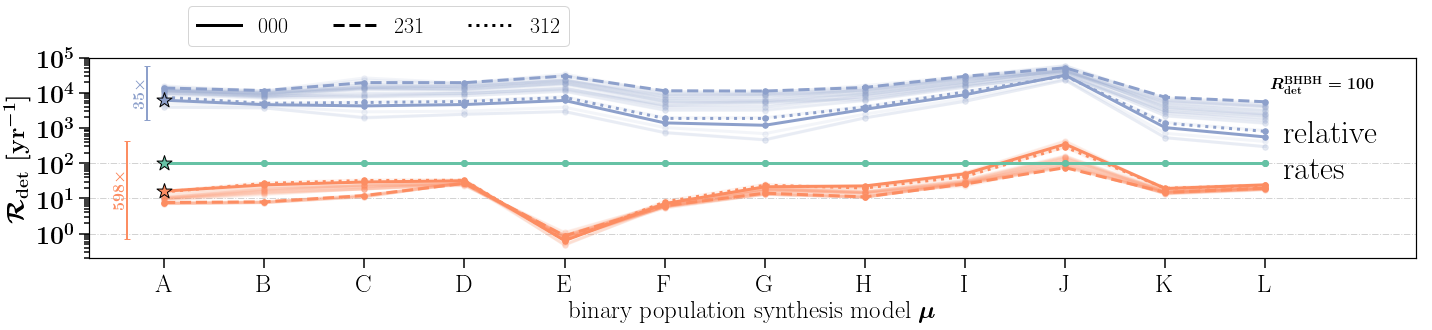

In [586]:

ylims = [[0.002, 200], [0.001, 200], [0.2, 100000]]
plotRatesMSSFRandModelsRatiosToBHNS(whichRate='observed')

('the intrinsic fiducial rate =', 69.71771793870406)
('the intrinsic fiducial rate =', 37.343646073393614)
('the intrinsic fiducial rate =', 37.23775540786914)
('fiducial BHNS ratio = ', 186.69231655014033)
('fiducial NSNS ratio = ', 99.71644261699471)
per 50 BHBHs:
('fiducial BHNS ratio = ', 93.34615827507017)
('fiducial NSNS ratio = ', 49.858221308497356)
('NSNS ratio in = [', 4.261680979472162, ' , ', 2408.8792446360353, ']')
('BHNS ratio in = [', 36.17691290559691, ' , ', 1123.759395942642, ']')
per 50 BHBHs:
('NSNS ratio in = [', 2.130840489736081, ' , ', 1204.4396223180177, ']')
('BHNS ratio in = [', 18.088456452798454, ' , ', 561.879697971321, ']')


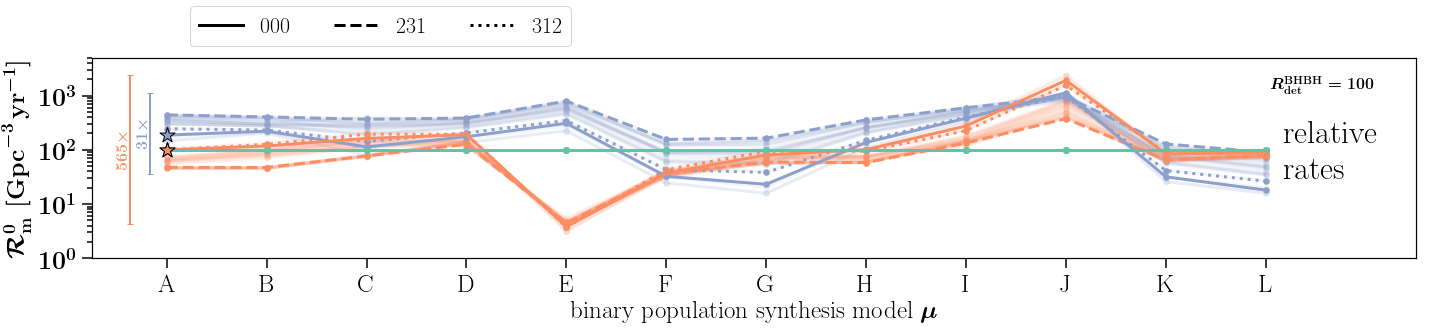

In [589]:

ylims = [[0.002, 200], [0.001, 200], [1, 5000]]
plotRatesMSSFRandModelsRatiosToBHNS(whichRate='intrinsic')

In [ ]:
# ONLY BHNSrate0

In [1112]:
def plotRatesMSSFRandModelsAnalysisBHNS(whichRate='intrinsic'):
    ncols=1
    nrows=1
    # 20, 12
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
#     nrDATAready = 12
    nModels=12
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    
    for ind_t, DCOtype in enumerate(Types):
        if DCOtype=='BHNS':
        
            for ind_L, MSSFRname in enumerate(MSSFRnameslist):


                # remove if statement once also created datafiles for BHBH ans NSNS
    #             if (DCOtype == 'BHNS') or (DCOtype =='BBH'):
                stringgg =   'AllDCOsimulation'
#                 df_name = 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '.csv' 
                df = pd.read_csv('rates_MSSFR_Models_' + TypesLabels[ind_t]+  '_' + stringgg +'.csv', index_col=0).T
                rates_L = df[MSSFRnameslistCSV[ind_L]]

                if whichRate =='intrinsic':
                    rates = rates_L[::2][0:nModels]
    #                     print(rates)
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'







                elif whichRate=='observed':
                    rates = rates_L[1::2][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'




                if ind_L==0:
                    COLOR= TypeColours[ind_t]#  'crimson'
                    zorder = 100
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[0]
                    ALPHA=1
                elif ind_L in [1]:
                    COLOR=TypeColours[ind_t]#'teal'
                    zorder=10
                    label=MSSFRnameslist[ind_L] 
                    ls = MSSFRlinestyles[1]
                    ALPHA=1
                elif ind_L in [2]:
                    COLOR=TypeColours[ind_t]#'c'
                    zorder=10
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[2]
                    ALPHA=1
                elif ind_L in [7]:
                    zorder=10
                    COLOR=TypeColours[ind_t]#'gold'
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[3]
                    ALPHA=1
                else:
                    COLOR=TypeColours[ind_t]# 'lightgray' #MSSFRcolors[ind_L]
                    zorder=2
                    label=None    
                    ls = MSSFRlinestyles[0]
                    ALPHA=0.1

                axe.plot(range(len(rates)), rates, c=COLOR, lw=3, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                axe.scatter(range(len(rates)), rates, c=COLOR, s=30, label=label, zorder=zorder, alpha=ALPHA, linestyle=ls)
                # plot fiducial result with a star
                if ind_L==0:
                    axe.scatter(range(len(rates))[0], rates[0],\
                                       c=COLOR, s=250, label=label, \
                                       zorder=1000, marker='*', edgecolor='black')


    #         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
            # calculate statistics: 
            minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)

            print('mean scatter per MSSFR:')
            print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
            meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

            print('mean scatter per BPS:')
    #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
            print(minMaxPerBPS[0])
            print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
            meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
    #         x = nrDATAready 
            textt_MSSFR = r'$\langle \sigma_{\rm{xyz}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
            textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
            minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])
            if whichRate=='intrinsic':
                textt_min = r'$\mathcal{R}_{\rm{m,min}}^0 = %s $'%roundAndFormat(minn)
                textt_max = r'$\mathcal{R}_{\rm{m,max}}^0 = %s $'%roundAndFormat(maxx)
            else:
                textt_min = r'$\mathcal{R}_{\rm{det,min}} = %s $'%roundAndFormat(minn)
                textt_max = r'$\mathcal{R}_{\rm{det,max}} = %s $'%roundAndFormat(maxx)                
                
                
            axe.text(0.905, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
            axe.text(0.905, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

    #         axe.text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    #         axe.text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')


            ## MAKE RANGE ERROR LINE: 
            resN = 20
            scatterline_x = -0.25 * np.ones(resN)
            scatterline_y = np.linspace(minn,maxx, resN)
            axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
            textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
            yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
            axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')


            axe.text(-0.47, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
            axe.text(-0.47, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')



            xmin = -0.8
            xmax = nModels +0.5 # change to len(df.T)
            xx = np.linspace(xmin,xmax,15)

            if whichRate=='intrinsic':
                min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
                max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
                axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=0)

                # for BHNS plot that its a upper limit
                if ind_t==1:
                    axe.scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)

            else:
                for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                    axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
                axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )


    #         # make up axes
            if ind_t ==1:
                xlabel = r'binary population synthesis model $\mu$'
            else:
                xlabel=r'  $\_$ '

            axe.set_xlim(xmin, xmax)
            axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
            axe.set_yscale('log')

             # Set the tick labels
    #         if ind_t==2:
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(BPSnameslist)

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

            axe.text(0.905, 0.8, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

            if ind_t==1: 
                handles, labels = axe.get_legend_handles_labels()
                mask = [0,1,2,7]
                labels=['000', '111', '211', '113']
                lgd = f.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
                         bbox_to_anchor=(.76, 1.12),  markerscale=2., scatterpoints=1) # loc = 'upper center')        


    plt.tight_layout()
    plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
    plt.savefig('./Rates_' +whichRate + '_BHNS.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




('the intrinsic fiducial rate for ', 'BHNS', '=', 37.343646073393614)
[ 0  1  2  3  4  5  6  7  8  9 10 11]
mean scatter per MSSFR:
32.251040338063014
mean scatter per BPS:
[ 30.35497762  71.73969988  14.05220031  13.63494559   6.5268811
  58.73353532 138.80870862  13.34376226   5.45580459   2.58499451
  70.26157222 134.50069578]
8.049035207415011


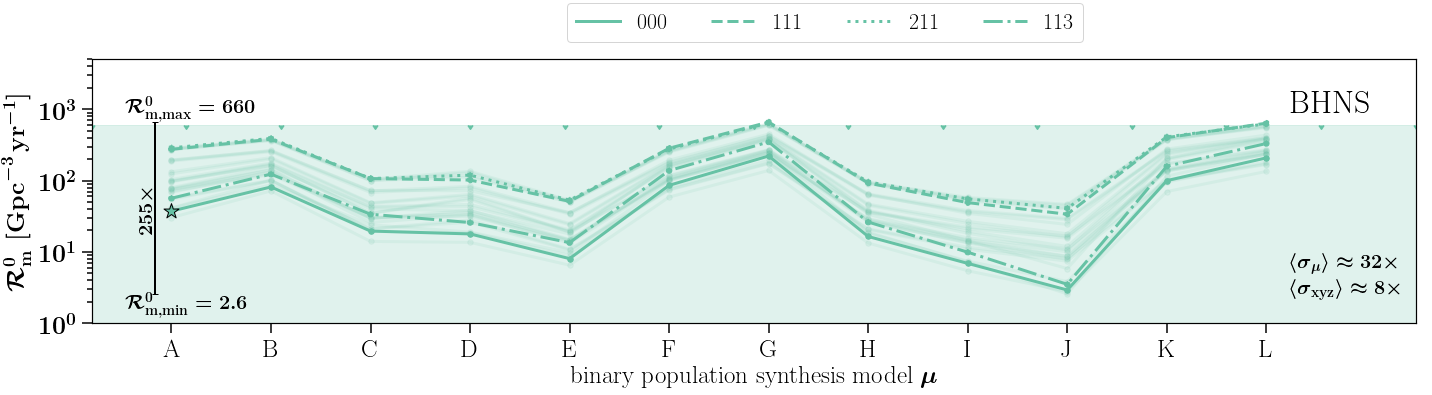

In [1113]:
ylims =[[7,2000],[1,5000],[0.1,3000]]
plotRatesMSSFRandModelsAnalysisBHNS(whichRate='intrinsic')

In [1124]:
def plotRatesMSSFRandModelsAnalysisBHNSColors(whichRate='intrinsic'):
    ncols=1
    nrows=1
    # 20, 12
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
#     nrDATAready = 12
    nModels=12
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    
    for ind_t, DCOtype in enumerate(Types):
        if DCOtype=='BHNS':
        
            for ind_L, MSSFRname in enumerate(MSSFRnameslist):


                # remove if statement once also created datafiles for BHBH ans NSNS
    #             if (DCOtype == 'BHNS') or (DCOtype =='BBH'):
                stringgg = 'AllDCOsimulation'
                df_name = 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
                df = pd.read_csv(df_name, index_col=0).T
                rates_L = df[MSSFRnameslistCSV[ind_L]]

                if whichRate =='intrinsic':
                    rates = rates_L[::2][0:nModels]
    #                     print(rates)
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'







                elif whichRate=='observed':
                    rates = rates_L[1::2][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'




                if ind_L==0:
                    COLOR= TypeColours[ind_t]#  'crimson'
                    zorder = 100
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[0]
                    ALPHA=1
                elif ind_L in [20]:
                    COLOR=TypeColours[ind_t]#'teal'
                    zorder=10
                    label=MSSFRnameslist[ind_L] 
                    ls = MSSFRlinestyles[1]
                    ALPHA=1
                elif ind_L in [6]:
                    COLOR=TypeColours[ind_t]#'c'
                    zorder=10
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[2]
                    ALPHA=1
#                 elif ind_L in [7]:
#                     zorder=10
#                     COLOR=TypeColours[ind_t]#'gold'
#                     label=MSSFRnameslist[ind_L]
#                     ls = MSSFRlinestyles[3]
#                     ALPHA=1
                else:
                    COLOR=TypeColours[ind_t]# 'lightgray' #MSSFRcolors[ind_L]
                    zorder=2
                    label=None    
                    ls = MSSFRlinestyles[0]
                    ALPHA=0.1

                axe.plot(range(len(rates)), rates, c='k', lw=3, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                axe.scatter(range(len(rates)), rates, c=BPScolors, s=120, label=label, zorder=zorder+1, alpha=ALPHA, linestyle=ls)
                # plot fiducial result with a star
                if ind_L==0:
                    axe.scatter(range(len(rates))[0], rates[0],\
                                       c=BPScolors[0], s=400, label=label, \
                                       zorder=1000, marker='*', edgecolor='black')


    #         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
            # calculate statistics: 
            minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)

            print('mean scatter per MSSFR:')
            print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
            meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

            print('mean scatter per BPS:')
    #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
            print(minMaxPerBPS[0])
            print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
            meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
    #         x = nrDATAready 
            textt_MSSFR = r'$\langle \sigma_{\rm{xyz}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
            textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
            minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])
            
            
        
            textt_min = roundAndFormat(minn)
            textt_max = roundAndFormat(maxx)
#             textt_min = r'$\rm{min} =  %s$'%textt_min
#             textt_max = r'$\rm{max} =  %s$'%textt_max

            
            if whichRate=='intrinsic':
                textt_min = r'$\mathcal{R}^0_{\rm{m,min}} = %s $'%textt_min
                textt_max = r'$\mathcal{R}^0_{\rm{m,max}} = %s $'%textt_max
            elif whichRate=='observed':
                textt_min = r'$\mathcal{R}_{\rm{det,min}} = %s $'%textt_min
                textt_max = r'$\mathcal{R}_{\rm{det,max}} = %s $'%textt_max
                
            axe.text(0.905, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
            axe.text(0.905, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

    #         axe.text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    #         axe.text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')


            ## MAKE RANGE ERROR LINE: 
            resN = 20
            scatterline_x = -0.25 * np.ones(resN)
            scatterline_y = np.linspace(minn,maxx, resN)
            axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
            textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
            yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
            axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')


            axe.text(-0.47, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
            axe.text(-0.47, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')



            xmin = -0.8
            xmax = nModels +0.5 # change to len(df.T)
            xx = np.linspace(xmin,xmax,15)

            if whichRate=='intrinsic':
                min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
                max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
                axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color='gray', zorder=0)

                # for BHNS plot that its a upper limit
                if ind_t==1:
                    axe.scatter(xx, max_obs_rate, marker=11, color='gray', zorder=0, s=45)

            else:
                for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                    axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
                axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )


    #         # make up axes
            if ind_t ==1:
                xlabel = r'binary population synthesis model $\mu$'
            else:
                xlabel=r'  $\_$ '

            axe.set_xlim(xmin, xmax)
            axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
            axe.set_yscale('log')

             # Set the tick labels
    #         if ind_t==2:
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(BPSnameslist)

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

            axe.text(0.905, 0.8, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

#             if ind_t==1: 
#                 handles, labels = axe.get_legend_handles_labels()
#                 mask = [0,20,6]
#                 labels = ['000',  '231', '312']
#                 lgd = f.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
#                          bbox_to_anchor=(.76, 1.12),  markerscale=2., scatterpoints=1) # loc = 'upper center')        


    plt.tight_layout()
    plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
#     plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False)
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




In [1125]:
def roundAndFormat(xxx):
    st = '{:0.2}'.format(xxx) # round
    st = ('%f' %float(st)).rstrip('0').rstrip('.') # format
    return str(st)


print(roundAndFormat(0.44234))
    

0.44


('the intrinsic fiducial rate for ', 'BHNS', '=', 37.343646073393614)
[ 0  1  2  3  4  5  6  7  8  9 10 11]
mean scatter per MSSFR:
32.251040338063014
mean scatter per BPS:
[ 30.35497762  71.73969988  14.05220031  13.63494559   6.5268811
  58.73353532 138.80870862  13.34376226   5.45580459   2.58499451
  70.26157222 134.50069578]
8.049035207415011


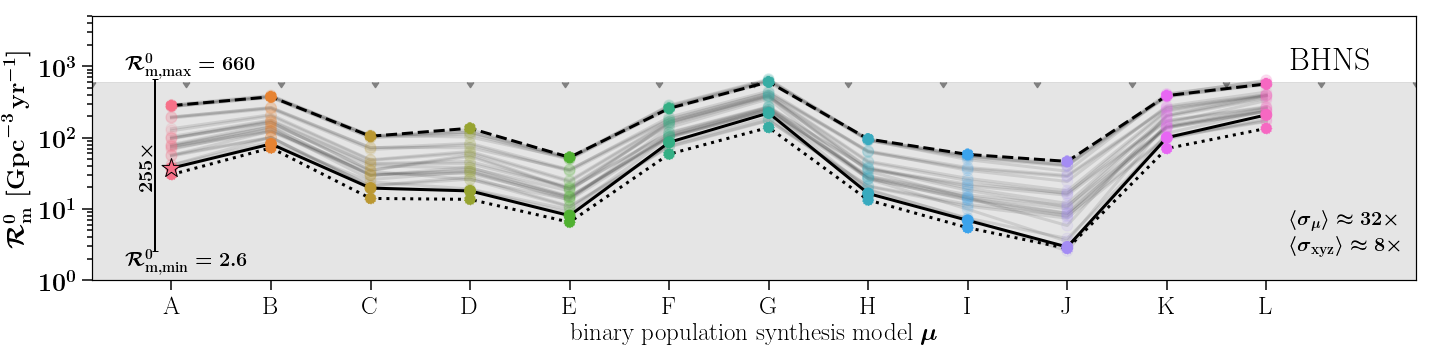

In [1126]:
ylims =[[7,2000],[1,5000],[0.1,3000]]
plotRatesMSSFRandModelsAnalysisBHNSColors(whichRate='intrinsic')

('the observed fiducial rate for ', 'BHNS', '=', 9.331220849069377)
[ 0  1  2  3  4  5  6  7  8  9 10 11]
mean scatter per MSSFR:
29.119519874258142
mean scatter per BPS:
[ 8.06267484 15.46623924  3.18569399  3.46416799  2.51455086 10.49325946
 24.23542679  2.58359316  1.14326697  0.52980803 13.8721116  23.33821649]
8.864326600662075


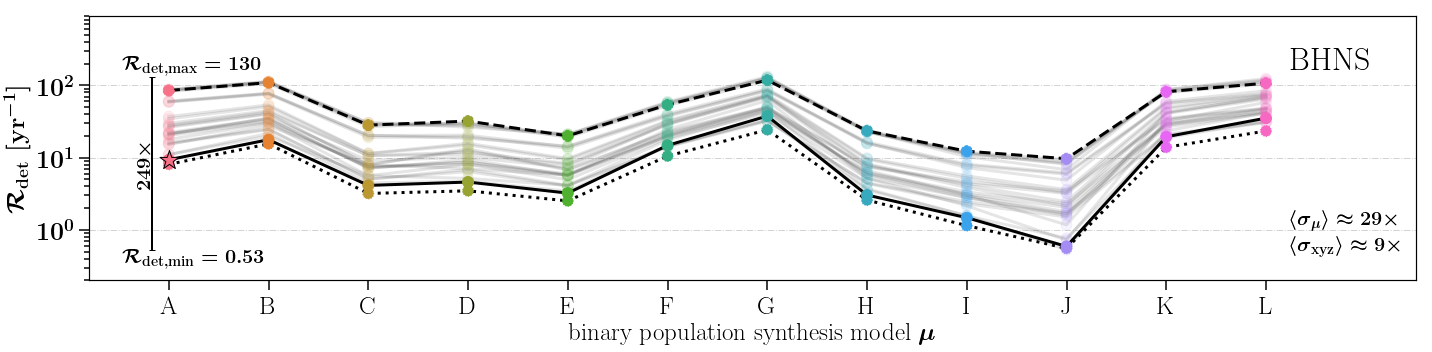

In [1127]:

ylims = [[30, 2E4], [0.2, 900], [0.0082, 70]]
plotRatesMSSFRandModelsAnalysisBHNSColors(whichRate='observed')

In [ ]:
# def plotRatesEM(whichRate='intrinsic'):
#     ncols=1
#     nrows=1
#     f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    
    
    
#     # constants
#     Zsolar=0.0142
#     nModels = 12
#     BPScolors       = sns.color_palette("husl", nModels)
#     lw = 3.5
#     Virgo         = '/Volumes/Virgo/DATA/BHNS/'
#     VirgoAllDCO = '/Volumes/Virgo/DATA/AllDCO/'
#     AndromedaBHNS = '/Volumes/Andromeda/DATA/BHNS/'
#     AndromedaAllDCO  = '/Volumes/Andromeda/DATA/AllDCO/'

#     alphabet = list(string.ascii_uppercase)
#     BPSnameslist = alphabet[:nModels=12]

#     BPSdir = ['fiducial/', 'fiducial/', 'alpha0_5/', 'alpha2_0/', None, 'rapid/', 'zeroBHkick/', None, None, None, 'ccSNkick_100km_s/', 'ccSNkick_30km_s/']

#     dictBPSnameToDir   = dict(zip(BPSnameslist, BPSdir))    
#     dictBPSnameToColor = dict(zip(BPSnameslist, BPScolors))
    
    
 
#     Types      = ['BBH', 'BHNS', 'BNS']
#     TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
#     TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
#     ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
#     MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
# #     MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    

    
#     maxRatio_BHNS = -100
#     maxRatio_BNS = -100
#     minRatio_BHNS = 100
#     minRatio_BNS = 100
    
#     for ind_L, MSSFRname in enumerate(MSSFRnameslist):
#         for ind_t, DCOtype in enumerate(Types):


#             df_name = 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '.csv' 
#             df = pd.read_csv('rates_MSSFR_Models_' + TypesLabels[ind_t]+'.csv', index_col=0).T
#             rates_L = df[MSSFRnameslistCSV[ind_L]]

#             if whichRate =='intrinsic':
#                 rates = rates_L[::2][:nModels]
#     #                     print(rates)
#                 if ind_L==0:
#                     print('the intrinsic fiducial rate =',rates[0]) 

#                 ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'


#             elif whichRate=='observed':
#                 rates = rates_L[1::2][:nModels]
#                 if ind_L==0:
#                     print('the observed fiducial rate =',rates[0]) 
#                 ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'



#             if DCOtype=='BBH':
#                 rates_BBH = rates
#             elif DCOtype=='BHNS':
#                 rates_BHNS = rates
#             elif DCOtype=='BNS':
#                 rates_BNS = rates
                
            
#         # normalize s.t. BBH is always 100
# #         print(rates_BBH)
#         rates_BHNS = rates_BHNS * (100./rates_BBH)
#         rates_BNS = rates_BNS * (100./rates_BBH)
#         if ind_L==0:
#             print('fiducial BHNS ratio = ', rates_BHNS[0])
#             print('fiducial NSNS ratio = ', rates_BNS[0])
#             print('per 50 BHBHs:')
#             print('fiducial BHNS ratio = ', rates_BHNS[0]/2)
#             print('fiducial NSNS ratio = ', rates_BNS[0]/2)
        
#         maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
#         maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
#         minRatio_BHNS = np.min(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
#         minRatio_BNS  = np.min(np.concatenate(([maxRatio_BNS], rates_BNS)))
            
#         if ind_L==0:
#             COLOR='crimson'
#             zorder = 100
#             label=MSSFRnameslist[ind_L]
#             ls = MSSFRlinestyles[0]
#             ALPHA=1
#         elif ind_L in [20]:#[1]:
#             COLOR='teal'
#             zorder=10
#             label=MSSFRnameslist[ind_L]
#             ls=MSSFRlinestyles[1]
#             ALPHA=1
#         elif ind_L in [6]: #[2]:
#             COLOR='c'
#             zorder=10
#             label=MSSFRnameslist[ind_L]
#             ls = MSSFRlinestyles[2]
#             ALPHA=1
# #         elif ind_L in [7]:
# #             zorder=10
# #             COLOR='gold'
# #             label=MSSFRnameslist[ind_L]
# #             ls = MSSFRlinestyles[3]
# #             ALPHA=1
#         else:
#             COLOR= 'lightgray' #MSSFRcolors[ind_L]
#             zorder=2
#             label=None      
#             ls = MSSFRlinestyles[0]
#             ALPHA=0.1
            
            
#         rates_BBH = (rates_BBH / rates_BBH)    * 100 
#         axe.plot(range(len(rates)), rates_BBH, c=TypeColours[0], lw=3, zorder=zorder, linestyle=ls, alpha=ALPHA)
#         axe.scatter(range(len(rates)), rates_BBH, c=TypeColours[0], s=30,  zorder=zorder, alpha=ALPHA) 
            
#         axe.plot(range(len(rates)), rates_BNS, c=TypeColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
#         axe.scatter(range(len(rates)), rates_BNS, c=TypeColours[2], s=30,  zorder=zorder, alpha=ALPHA) 
        
#         axe.plot(range(len(rates)), rates_BHNS, c=TypeColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
#         axe.scatter(range(len(rates)), rates_BHNS, c=TypeColours[1], s=30, zorder=zorder, alpha=ALPHA)
        
#         axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)

#         # plot fiducial result with a star
#         if ind_L==0:
#             axe.scatter(range(len(rates))[0], rates_BBH[0],\
#                                c=TypeColours[0], s=250, label=None, \
#                                zorder=1000, marker='*', edgecolor='black')
                
#             axe.scatter(range(len(rates))[0], rates_BHNS[0],\
#                                c=TypeColours[1], s=250, label=None, \
#                                zorder=1000, marker='*', edgecolor='black')
#             axe.scatter(range(len(rates))[0], rates_BNS[0],\
#                                c=TypeColours[2], s=250, label=None, \
#                                zorder=1000, marker='*', edgecolor='black')
            
# #         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
#     # calculate statistics: 
# #     minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t)

# #     print('mean scatter per MSSFR:')
# #     print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
# #     meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

# #     print('mean scatter per BPS:')
# # #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
# #     print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
# #     meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# # #         x = nrDATAready 
# #     textt_MSSFR = r'$\langle \sigma_{\rm{.x.y.z}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
# #     textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
# #     minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])

# #     textt_min = r'$\mathcal{R}_{\rm{m,min}} = %.2f $'%minn
# #     textt_max = r'$\mathcal{R}_{\rm{m,max}} = %.2f $'%maxx

# #     axe.text(0.89, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
# #     axe.text(0.89, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

# #     axe.text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
# #     axe.text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

# #     resN = 20
# #     scatterline_x = -0.25 * np.ones(resN)
# #     scatterline_y = np.linspace(minn,maxx, resN)
# #     axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
# #     textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
# #     yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
# #     axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

#     xmin = -0.6
#     xmax = nrDATAready +0.5 # change to len(df.T)
#     xx = np.linspace(xmin,xmax,15)

#     if whichRate=='intrinsic':
#         min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
#         max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
# #         axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.3, color=TypeColours[ind_t], zorder=0)

#         # for BHNS plot that its a upper limit
#         if ind_t==1:
#             axe.scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)

#     else:
#         for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
#             axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
#         axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

    
# #         axe.scatter(np.asarray(range(len(rates)))*1000, rates_BHNS, c='k', s=30, label=label, zorder=zorder, alpha=ALPHA)  
# #         # make up axes
#     if ind_t ==2:
#         xlabel = r'binary population synthesis model $\mu$'
#     else:
#         xlabel=r'  $\_$ '

#     axe.set_xlim(xmin, xmax)
#     axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
#     axe.set_yscale('log')


#     axe.set_xticks(range(nModels))
#     axe.set_xticklabels(BPSnameslist)

#     axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

#     axe.text(0.9, 0.4, 'relative \n rates  ' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    
#     axe.text(0.89, 0.82, r'$R_{\rm{det}}^{\rm{BHBH}}=100$ ' , rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
# # 

#     handles, labels = axe.get_legend_handles_labels()
# #     mask = [3,7,11,31]
# #     [0,1,2,7]
# #             mask = [0,1,2,7]
#     mask=[3,83, 27]
# #             labels=['000', '111', '211', '113']
#     labels = ['000',  '231', '312']
#     lgd = axe.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
#              bbox_to_anchor=(.37, 1.31),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

    
#     print('NSNS ratio in = [', minRatio_BNS, ' , ', maxRatio_BNS, ']')
#     print('BHNS ratio in = [', minRatio_BHNS, ' , ', maxRatio_BHNS, ']')
#     print('per 50 BHBHs:')
#     print('NSNS ratio in = [', minRatio_BNS/2, ' , ', maxRatio_BNS/2, ']')
#     print('BHNS ratio in = [', minRatio_BHNS/2, ' , ', maxRatio_BHNS/2, ']')    
    
#     plt.tight_layout()
# #     plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
#     plt.savefig('./RatesRatios_' +whichRate + '.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
#     plt.show()

#     plt.close()

#     return




In [824]:
# def plotRatesEM(whichRate='intrinsic'):
#     ncols=1
#     nrows=1
#     f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
#     Types      = ['BBH', 'BHNS', 'BNS']
#     TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
#     TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
#     ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
#     MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
#     MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
#     EMColours = ['#66c2a5', 'gold', 'orange', 'dodgerblue', 'navy']
    
#     nrDATAready = 12
#     nModels=12
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
#     maxRatio_BHNS = -100
#     maxRatio_BNS = -100
#     minRatio_BHNS = 100
#     minRatio_BNS = 100
    
#     iii=0
#     namesEMlist =['BHNS']
#     for ind_chi, chi in enumerate([0.0, 0.5]):
#         # print(chi)
#         iii+=1
#         BH_chi   = chi 
#         for ind_Rns, NSradii in enumerate([11.5,13.0]):
#             iii+=1
#             Rns = NSradii
#             # if ind_mssfr ==0:
#             # 	# print(chi)
#             stringg = 'Rns_'+ str(NSradii) + 'km_' + 'spinBH_' + str(chi) 
#             namesEMlist.append(stringg)
#     ind_t = 1
#     for ind_L, MSSFRname in enumerate(MSSFRnameslist):
#         for ind_EM, EMtype in enumerate(namesEMlist):
#             if ind_EM ==0:
#                 sss = TypesLabels[ind_t]+ '_' + 'AllDCOsimulation'
#             else:
#                 sss = TypesLabels[ind_t]+ '_' + EMtype
            
#             ind_t = 1
#             df_name = 'rates_MSSFR_Models_' + sss + '.csv' 
#             df = pd.read_csv('rates_MSSFR_Models_' + sss+'.csv', index_col=0).T
#             rates_L = df[MSSFRnameslistCSV[ind_L]]

#             if whichRate =='intrinsic':
#                 rates = rates_L[::2][:nModels]
#     #                     print(rates)
#                 if ind_L==0:
#                     print('the intrinsic fiducial rate =',rates[0]) 

# #                 ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
#                 ylabel = r'fraction NS disrupted'

#             elif whichRate=='observed':
#                 rates = rates_L[1::2][:nModels]
#                 if ind_L==0:
#                     print('the observed fiducial rate =',rates[0]) 
#                 ylabel = r'fraction NS disrupted'#r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'




#             if EMtype=='BHNS':
#                 rates_BHNS = rates
#             elif EMtype==namesEMlist[1]:
#                 rates_11_0 = rates
# #                 print(namesEMlist[1])
                
#             elif EMtype==namesEMlist[2]:
#                 rates_13_0 = rates
# #                 print(namesEMlist[2])
                
#             elif EMtype==namesEMlist[3]:
#                 rates_11_5 = rates
# #                 print(namesEMlist[3])
#             elif EMtype==namesEMlist[4]:
#                 rates_13_5 = rates
# #                 print(namesEMlist[4])
                
#         # normalize s.t. BBH is always 100
# #         print(rates_BBH)
#         rates_11_0 = rates_11_0 * (100./rates_BHNS)
#         rates_13_0 = rates_13_0 * (100./rates_BHNS)
#         rates_11_5 = rates_11_5 * (100./rates_BHNS)
#         rates_13_5 = rates_13_5 * (100./rates_BHNS)
# #         print(rates_13_5)
# #         rates_BNS = rates_BNS * (100./rates_BH)
# #         if ind_L==0:
# #             print('fiducial BHNS ratio = ', rates_BHNS[0])
# #             print('fiducial NSNS ratio = ', rates_BNS[0])
# #             print('per 50 BHBHs:')
# #             print('fiducial BHNS ratio = ', rates_BHNS[0]/2)
# #             print('fiducial NSNS ratio = ', rates_BNS[0]/2)
        
#         maxRatio_BHNS = np.max(np.concatenate((rates_13_5, rates_BHNS)))
# #         maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
# #         minRatio_BHNS = np.min(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
# #         minRatio_BNS  = np.min(np.concatenate(([maxRatio_BNS], rates_BNS)))
            
#         if ind_L==0:
#             COLOR='crimson'
#             zorder = 100
#             label=MSSFRnameslist[ind_L]
#             ls = MSSFRlinestyles[0]
#             ALPHA=1
#         elif ind_L in [20]:#[1]:
#             COLOR='teal'
#             zorder=10
#             label=MSSFRnameslist[ind_L]
#             ls=MSSFRlinestyles[1]
#             ALPHA=1
#         elif ind_L in [6]: #[2]:
#             COLOR='c'
#             zorder=10
#             label=MSSFRnameslist[ind_L]
#             ls = MSSFRlinestyles[2]
#             ALPHA=1
# #         elif ind_L in [7]:
# #             zorder=10
# #             COLOR='gold'
# #             label=MSSFRnameslist[ind_L]
# #             ls = MSSFRlinestyles[3]
# #             ALPHA=1
#         else:
#             COLOR= 'lightgray' #MSSFRcolors[ind_L]
#             zorder=2
#             label=None      
#             ls = MSSFRlinestyles[0]
#             ALPHA=0.1
            
            
#         rates_BHNS = (rates_BHNS / rates_BHNS)    * 100 
# #         axe.plot(range(len(rates)), rates_BHNS, c=EMColours[0], lw=3, zorder=zorder, linestyle=ls, alpha=ALPHA)
# #         axe.scatter(range(len(rates)), rates_BHNS, c=EMColours[0], s=30,  zorder=zorder, alpha=ALPHA) 
            
#         axe.plot(range(len(rates)), rates_11_0, c=EMColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
#         axe.scatter(range(len(rates)), rates_11_0, c=EMColours[1], s=30,  zorder=zorder, alpha=ALPHA) 
        
#         axe.plot(range(len(rates)), rates_13_0, c=EMColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
#         axe.scatter(range(len(rates)), rates_13_0, c=EMColours[2], s=30, zorder=zorder, alpha=ALPHA)

#         axe.plot(range(len(rates)), rates_11_5, c=EMColours[3], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
#         axe.scatter(range(len(rates)), rates_11_5, c=EMColours[3], s=30,  zorder=zorder, alpha=ALPHA) 
        
#         axe.plot(range(len(rates)), rates_13_5, c=EMColours[4], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
#         axe.scatter(range(len(rates)), rates_13_5, c=EMColours[4], s=30, zorder=zorder, alpha=ALPHA)

                
        

#         axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)
# ################
#         # plot fiducial result with a star
# #         if ind_L==0:
# #             axe.scatter(range(len(rates))[0], rates_BBH[0],\
# #                                c=TypeColours[0], s=250, label=None, \
# #                                zorder=1000, marker='*', edgecolor='black')
                
# #             axe.scatter(range(len(rates))[0], rates_BHNS[0],\
# #                                c=TypeColours[1], s=250, label=None, \
# #                                zorder=1000, marker='*', edgecolor='black')
# #             axe.scatter(range(len(rates))[0], rates_BNS[0],\
# #                                c=TypeColours[2], s=250, label=None, \
# #                                zorder=1000, marker='*', edgecolor='black')
            
            

                
            
#       ################      
            
            
# #         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
#     # calculate statistics: 
# #     minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t)

# #     print('mean scatter per MSSFR:')
# #     print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
# #     meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

# #     print('mean scatter per BPS:')
# # #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
# #     print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
# #     meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# # #         x = nrDATAready 
# #     textt_MSSFR = r'$\langle \sigma_{\rm{.x.y.z}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
# #     textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
# #     minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])

# #     textt_min = r'$\mathcal{R}_{\rm{m,min}} = %.2f $'%minn
# #     textt_max = r'$\mathcal{R}_{\rm{m,max}} = %.2f $'%maxx

# #     axe.text(0.89, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
# #     axe.text(0.89, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

# #     axe.text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
# #     axe.text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     minn, maxx = 0.00001, maxRatio_BHNS 
#     print(maxRatio_BHNS, 'max')
#     resN = 20
#     scatterline_x = -0.25 * np.ones(resN)
#     scatterline_y = np.linspace(minn,maxx, resN)
#     axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
# #     textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
# #     yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
# #     axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')



            
#     if whichRate=='intrinsic':
#         textt_min = r'$\rm{min} = %.2f $'%minn +  r'${\%}$'
#         textt_max = r'$\rm{max} = %.2f $'%maxx+  r'${\%}$'
#     elif whichRate=='observed':
#         textt_min = r'$\rm{min} = %.2f $'%minn+  r'${\%}$'
#         textt_max = r'$\rm{max} = %.2f $'%maxx+  r'${\%}$'

        
# #     axe.text(-0.47, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
#     axe.text(-0.47, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')


    
    
    
    
#     xmin = -0.6
#     xmax = nrDATAready +0.5 # change to len(df.T)
#     xx = np.linspace(xmin,xmax,15)


#     for ll in [0.01, 0.1, 1, 10, 100]:
#         axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
#     axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

    
# #         axe.scatter(np.asarray(range(len(rates)))*1000, rates_BHNS, c='k', s=30, label=label, zorder=zorder, alpha=ALPHA)  
# #         # make up axes
#     if ind_t ==1:
#         xlabel = r'binary population synthesis model $\mu$'
#     else:
#         xlabel=r'  $\_$ '

#     axe.set_xlim(xmin, xmax)
#     axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
#     axe.set_yscale('log')


#     axe.set_xticks(range(nModels))
#     axe.set_xticklabels(BPSnameslist)
#     axe.set_yticks([0.001, 0.1, 1, 10, 100])
#     axe.set_yticklabels([r'$0.0001$',r'$0.001$',r'$0.01$',r'$0.1$',r'$1$',])
    
#     axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
#     sss =  r'${\%}$'
#     axe.text(0.9, 0.4, sss+' NS \n disrupted ' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    
# #     axe.text(0.89, 0.82, r'$R_{\rm{det}}^{\rm{BHBH}}=100$ ' , rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
# # 

#     handles, labels = axe.get_legend_handles_labels()
# #     mask = [3,7,11,31]
# #     [0,1,2,7]
# #             mask = [0,1,2,7]
#     mask=[0,1,2,3]
# #             labels=['000', '111', '211', '113']
# #     labels = ['000',  '231', '312']
#     labels = [r'$(11.5\rm{km}, 0)$', r'$(13\rm{km}, 0)$', r'$(11.5\rm{km}, 0.5)$', r'$(13\rm{km}, 0.5)$']
#     lgd = axe.legend(np.asarray(handles)[mask], np.asarray(labels)[mask], fontsize=fs-2, ncol=9,\
#              bbox_to_anchor=(.77, 1.31),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

    
# #     print('NSNS ratio in = [', minRatio_BNS, ' , ', maxRatio_BNS, ']')
# #     print('BHNS ratio in = [', minRatio_BHNS, ' , ', maxRatio_BHNS, ']')
# #     print('per 50 BHBHs:')
# #     print('NSNS ratio in = [', minRatio_BNS/2, ' , ', maxRatio_BNS/2, ']')
# #     print('BHNS ratio in = [', minRatio_BHNS/2, ' , ', maxRatio_BHNS/2, ']')    
    
#     plt.tight_layout()
# #     plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
#     plt.savefig('./EMRatios_' +whichRate + 'log.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
#     plt.show()

#     plt.close()

#     return




('the observed fiducial rate =', 9.331220849069377)
('the observed fiducial rate =', 0.1943274926202581)
('the observed fiducial rate =', 0.4485293166009193)
('the observed fiducial rate =', 0.9666137905194762)
('the observed fiducial rate =', 1.942265237297604)
(56.9689208133263, 'max')


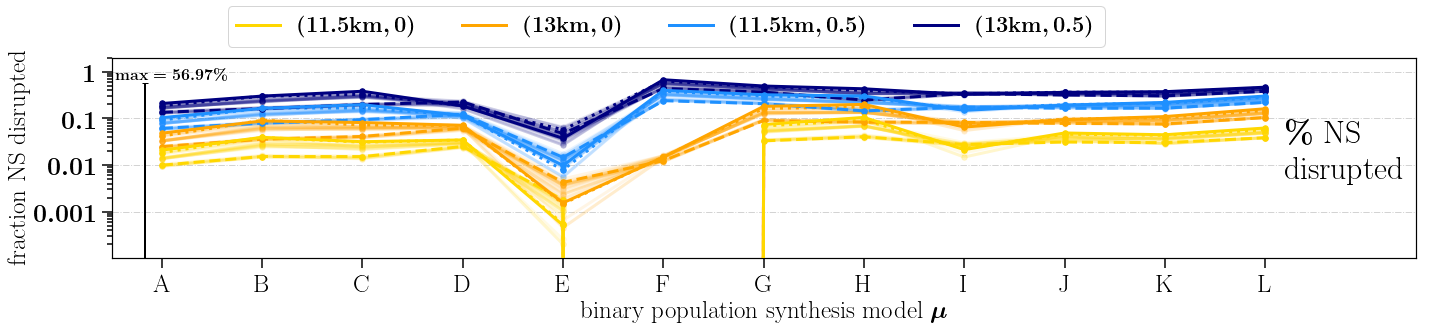

In [825]:
# ylims =[[7,200],[0.01,200],[0.1,200]]
# plotRatesEM(whichRate='observed')

('the intrinsic fiducial rate =', 37.343646073393614)
('the intrinsic fiducial rate =', 3.0524740258054504)
('the intrinsic fiducial rate =', 5.873982097555734)
('the intrinsic fiducial rate =', 10.020255547288757)
('the intrinsic fiducial rate =', 15.742873840718332)
(265.82442866222993, 'max')


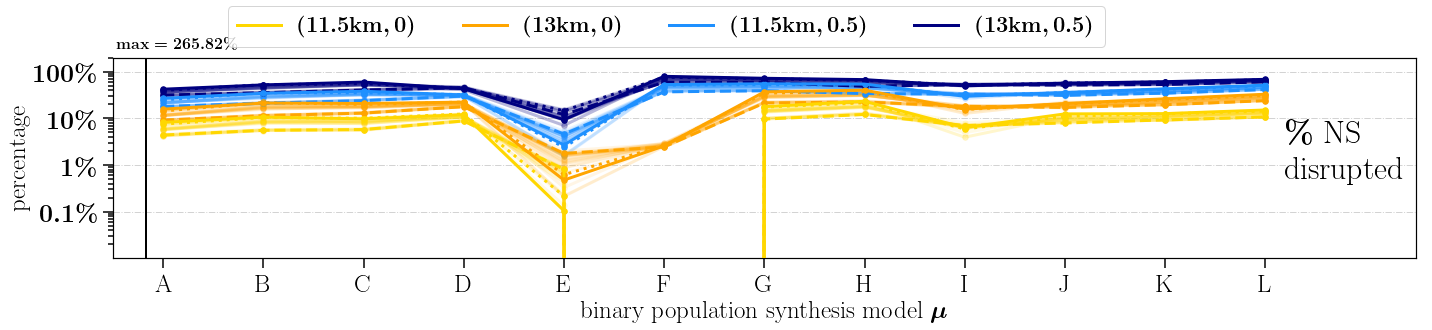

In [801]:
# ylims =[[7,2000],[0.01,200],[0.1,200]]
# plotRatesEM(whichRate='intrinsic')

In [1072]:
def plotRatesEM(whichRate='intrinsic'):
    ncols=1
    nrows=2
    f, (axe, axe2)= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":[3,1]}, sharex=True)
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
    EMColours = ['#66c2a5', 'gold', 'orange', 'dodgerblue', 'navy']
    
    nrDATAready = 12
    nModels=12
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100
    
    iii=0
    namesEMlist =['BHNS']
    for ind_chi, chi in enumerate([0.0, 0.5]):
        # print(chi)
        iii+=1
        BH_chi   = chi 
        for ind_Rns, NSradii in enumerate([11.5,13.0]):
            iii+=1
            Rns = NSradii
            # if ind_mssfr ==0:
            # 	# print(chi)
            stringg = 'Rns_'+ str(NSradii) + 'km_' + 'spinBH_' + str(chi) 
            namesEMlist.append(stringg)
    ind_t = 1
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_EM, EMtype in enumerate(namesEMlist):
            if ind_EM ==0:
                sss = TypesLabels[ind_t]+ '_' + 'AllDCOsimulation'
            else:
                sss = TypesLabels[ind_t]+ '_' + EMtype
            
            ind_t = 1
            df_name = 'rates_MSSFR_Models_' + sss + '.csv' 
            df = pd.read_csv('rates_MSSFR_Models_' + sss+'.csv', index_col=0).T
#             print(df)
            rates_L = df[MSSFRnameslistCSV[ind_L]]
    
            minHack = 0.000001
    

#             print(rates_L[mask0])
            
            if whichRate =='intrinsic':
                rates = rates_L[::2][:nModels]
    #                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate =',rates[0]) 

#                 ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
                ylabel = r'fraction disrupted NS'

            elif whichRate=='observed':
                rates = rates_L[1::2][:nModels]
                if ind_L==0:
                    print('the observed fiducial rate =',rates[0]) 
                ylabel = r'fraction disrupted NS'#r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'


            mask0 = (rates ==0)
#             print(np.sum(mask0))
#             print('sum mask')
            rates[mask0] = (np.ones(np.sum(mask0))*minHack)
# 


            if EMtype=='BHNS':
                rates_BHNS = rates
            elif EMtype==namesEMlist[1]:
                rates_11_0 = rates
#                 print(namesEMlist[1])
                
            elif EMtype==namesEMlist[2]:
                rates_13_0 = rates
#                 print(namesEMlist[2])
                
            elif EMtype==namesEMlist[3]:
                rates_11_5 = rates
#                 print(namesEMlist[3])
            elif EMtype==namesEMlist[4]:
                rates_13_5 = rates
#                 print(namesEMlist[4])
                
        # normalize s.t. BBH is always 100
#         print(rates_BBH)
        rates_11_0 = rates_11_0 * (100./rates_BHNS)
        rates_13_0 = rates_13_0 * (100./rates_BHNS)
        rates_11_5 = rates_11_5 * (100./rates_BHNS)
        rates_13_5 = rates_13_5 * (100./rates_BHNS)
        
        mask0 = (rates_11_0 == minHack*(100./rates_BHNS))
        rates_11_0[mask0] = (np.ones(np.sum(mask0))*minHack)
        
        mask0 = (rates_11_5 == minHack*(100./rates_BHNS))
        rates_11_5[mask0] = (np.ones(np.sum(mask0))*minHack)        

        mask0 = (rates_13_0 == minHack*(100./rates_BHNS))
        rates_13_0[mask0] = (np.ones(np.sum(mask0))*minHack)        

        mask0 = (rates_13_5 == minHack*(100./rates_BHNS))
        rates_13_5[mask0] = (np.ones(np.sum(mask0))*minHack)        

#         print(rates_11_0[mask0])
        
#         print(rates_13_5)
#         rates_BNS = rates_BNS * (100./rates_BH)
#         if ind_L==0:
#             print('fiducial BHNS ratio = ', rates_BHNS[0])
#             print('fiducial NSNS ratio = ', rates_BNS[0])
#             print('per 50 BHBHs:')
#             print('fiducial BHNS ratio = ', rates_BHNS[0]/2)
#             print('fiducial NSNS ratio = ', rates_BNS[0]/2)
        
        maxRatio_BHNS = np.max(np.concatenate((rates_13_5, rates_BHNS)))
#         maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
#         minRatio_BHNS = np.min(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
#         minRatio_BNS  = np.min(np.concatenate(([maxRatio_BNS], rates_BNS)))
            
        if ind_L==0:
            COLOR='crimson'
            zorder = 100
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[0]
            ALPHA=1
        elif ind_L in [20]:#[1]:
            COLOR='teal'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls=MSSFRlinestyles[1]
            ALPHA=1
        elif ind_L in [6]: #[2]:
            COLOR='c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
#         elif ind_L in [7]:
#             zorder=10
#             COLOR='gold'
#             label=MSSFRnameslist[ind_L]
#             ls = MSSFRlinestyles[3]
#             ALPHA=1
        else:
            COLOR= 'lightgray' #MSSFRcolors[ind_L]
            zorder=2
            label=None      
            ls = MSSFRlinestyles[0]
            ALPHA=0.1
            
            
        rates_BHNS = (rates_BHNS / rates_BHNS)    * 100 
#         axe.plot(range(len(rates)), rates_BHNS, c=EMColours[0], lw=3, zorder=zorder, linestyle=ls, alpha=ALPHA)
#         axe.scatter(range(len(rates)), rates_BHNS, c=EMColours[0], s=30,  zorder=zorder, alpha=ALPHA) 
            
        axe.plot(range(len(rates)), rates_11_0, c=EMColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_11_0, c=EMColours[1], s=30,  zorder=zorder, alpha=ALPHA) 
        axe2.plot(range(len(rates)), rates_11_0, c=EMColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe2.scatter(range(len(rates)), rates_11_0, c=EMColours[1], s=30,  zorder=zorder, alpha=ALPHA) 
        

        axe.plot(range(len(rates)), rates_13_0, c=EMColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_13_0, c=EMColours[2], s=30, zorder=zorder, alpha=ALPHA)
        axe2.plot(range(len(rates)), rates_13_0, c=EMColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe2.scatter(range(len(rates)), rates_13_0, c=EMColours[2], s=30, zorder=zorder, alpha=ALPHA)

        axe.plot(range(len(rates)), rates_11_5, c=EMColours[3], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_11_5, c=EMColours[3], s=30,  zorder=zorder, alpha=ALPHA) 
        axe2.plot(range(len(rates)), rates_11_5, c=EMColours[3], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe2.scatter(range(len(rates)), rates_11_5, c=EMColours[3], s=30,  zorder=zorder, alpha=ALPHA) 
                
        axe.plot(range(len(rates)), rates_13_5, c=EMColours[4], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_13_5, c=EMColours[4], s=30, zorder=zorder, alpha=ALPHA)
        axe2.plot(range(len(rates)), rates_13_5, c=EMColours[4], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe2.scatter(range(len(rates)), rates_13_5, c=EMColours[4], s=30, zorder=zorder, alpha=ALPHA)

                
        

        axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)
################
        # plot fiducial result with a star
        if ind_L==0:
            axe.scatter(range(len(rates))[0], rates_11_0[0],\
                               c=EMColours[1], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            axe.scatter(range(len(rates))[0], rates_13_0[0],\
                               c=EMColours[2], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')    
            
            axe.scatter(range(len(rates))[0], rates_11_5[0],\
                               c=EMColours[3], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            
            axe.scatter(range(len(rates))[0], rates_13_5[0],\
                               c=EMColours[4], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            
            


                
            
      ################      
            
            
#         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
    # calculate statistics: 
#     minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t)

#     print('mean scatter per MSSFR:')
#     print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
#     meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

#     print('mean scatter per BPS:')
# #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
#     print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
#     meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# #         x = nrDATAready 
#     textt_MSSFR = r'$\langle \sigma_{\rm{.x.y.z}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
#     textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
#     minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])

#     textt_min = r'$\mathcal{R}_{\rm{m,min}} = %.2f $'%minn
#     textt_max = r'$\mathcal{R}_{\rm{m,max}} = %.2f $'%maxx

#     axe.text(0.89, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     axe.text(0.89, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

#     axe.text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     axe.text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    minn, maxx = minHack, maxRatio_BHNS 
    print(maxRatio_BHNS, 'max')
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
    axe2.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)

        
    textt_min = '{:0.2}'.format(0.0)
    textt_max = '{:0.2}'.format(maxx/100.)
    textt_min = r'$\rm{min} =  %s$'%textt_min
    textt_max = r'$\rm{max} =  %s$'%textt_max


    minn = minHack
    axe2.text(-0.47, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
    axe.text(-0.47, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')


    
    
    
    
    xmin = -0.6
    xmax = nrDATAready  # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)


    for ll in [0.01, 0.1, 1, 10, 100]:
        axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

    
#         axe.scatter(np.asarray(range(len(rates)))*1000, rates_BHNS, c='k', s=30, label=label, zorder=zorder, alpha=ALPHA)  
#         # make up axes
    if ind_t ==1:
        xlabel = r'binary population synthesis model $\mu$'
    else:
        xlabel=r'  $\_$ '

        
        
    # broken axis from https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/broken_axis.html
    axe.spines['bottom'].set_visible(False)
    axe2.spines['top'].set_visible(False)    
    axe.xaxis.tick_top()
    axe.tick_params(labeltop=False)  # don't put tick labels at the top
    axe2.xaxis.tick_bottom()
    axe.tick_params(top=False)  # don't put tick labels at the top

    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0,0), (0,1),
    # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.

    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=axe.transAxes, color='k', clip_on=False)
    axe.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    axe.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal    

    kwargs.update(transform=axe2.transAxes)  # switch to the bottom axes
    axe2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    axe2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal    

    
            
        
        
    axe.set_xlim(xmin, xmax)
    axe == CV.layoutAxes(axe)
    axe2 == CV.layoutAxes(axe2, nameX=xlabel)
    axe.set_yscale('log')


    axe.set_xticks(range(nModels))
    axe.set_xticklabels(BPSnameslist)
    axe.set_yticks([0.1, 1, 10, 100])
    axe.set_yticklabels([r'$0.001$',r'$0.01$',r'$0.1$',r'$1$'])


    
    axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
    axe2.set_ylim(0.00000001, 0.00001)
    axe2.set_yscale('log')
#     axe2.set_yticks(False)
#     axe2.set_yticks([], [])
    
    
#     axe2.yaxis.set_ticks_position(minHack)

    axe2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    axe2.set_yticks([minHack], minor=False)
    axe2.set_yticklabels([r'$0$'])
#     sss =  r'${\%}$'
#     axe.text(0.9, 0.4, sss+' NS \n disrupted ' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    
    axe2.get_yaxis().set_tick_params(which='minor', size=0)
    axe2.get_yaxis().set_tick_params(which='minor', width=0) 

    handles, labels = axe.get_legend_handles_labels()
#     mask = [3,7,11,31]
#     [0,1,2,7]
#             mask = [0,1,2,7]
    mask=[0,1,2,3]
#             labels=['000', '111', '211', '113']
#     labels = ['000',  '231', '312']
    labels = [r'$(11.5\rm{km}, 0)$', r'$(13\rm{km}, 0)$', r'$(11.5\rm{km}, 0.5)$', r'$(13\rm{km}, 0.5)$']
    lgd = axe.legend(np.asarray(handles)[mask], np.asarray(labels)[mask], fontsize=fs-2, ncol=9,\
             bbox_to_anchor=(.77, 1.36),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

    
#     print('NSNS ratio in = [', minRatio_BNS, ' , ', maxRatio_BNS, ']')
#     print('BHNS ratio in = [', minRatio_BHNS, ' , ', maxRatio_BHNS, ']')
#     print('per 50 BHBHs:')
#     print('NSNS ratio in = [', minRatio_BNS/2, ' , ', maxRatio_BNS/2, ']')
#     print('BHNS ratio in = [', minRatio_BHNS/2, ' , ', maxRatio_BHNS/2, ']')    
    txtt = f.text(-0.0015, 0.5, 'fraction disrupted NS', va='center', ha='center', rotation='vertical', fontsize=fs)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.34, hspace=0.1)#2)
    plt.savefig('./EMRatios_' +whichRate + 'log.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd, txtt,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




('the observed fiducial rate =', 9.331220849069377)
('the observed fiducial rate =', 0.1943274926202581)
('the observed fiducial rate =', 0.4485293166009193)
('the observed fiducial rate =', 0.9666137905194762)
('the observed fiducial rate =', 1.942265237297604)
(56.9689208133263, 'max')


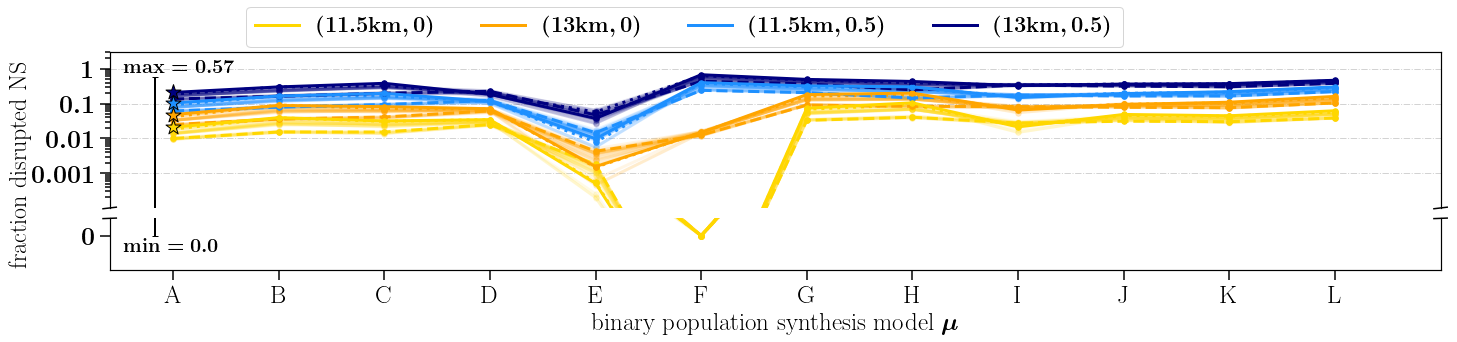

In [1063]:
import matplotlib.ticker
matplotlib.rcParams['ytick.minor.size'] = 0
matplotlib.rcParams['ytick.minor.width'] = 0

ylims =[[],[0.01,300],[]]
plotRatesEM(whichRate='observed')

In [1081]:
def plotRatesNSBH(whichRate='intrinsic'):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
    EMColours = ['#66c2a5',  'crimson', 'gold', 'k']
    
    nrDATAready = 12
    nModels=12
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100
    
    iii=0
    namesEMlist =['BHNS', 'NSBH']

    ind_t = 1
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_EM, EMtype in enumerate(namesEMlist):
            if ind_EM ==0:
                sss = TypesLabels[ind_t]+ '_' + 'AllDCOsimulation'
            else:
                sss = TypesLabels[ind_t]+ '_' + 'NSBH'
            
            ind_t = 1
            df_name = 'rates_MSSFR_Models_' + sss + '.csv' 
            df = pd.read_csv('rates_MSSFR_Models_' + sss+'.csv', index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][:nModels]
    #                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate =',rates[0]) 

#                 ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
                ylabel = r'\textbf{fraction NS-BH}'

            elif whichRate=='observed':
                rates = rates_L[1::2][:nModels]
                if ind_L==0:
                    print('the observed fiducial rate =',rates[0]) 
                ylabel = r'\textbf{fraction NS-BH} '#r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'




            if EMtype=='BHNS':
                rates_BHNS = rates
            elif EMtype==namesEMlist[1]:
                rates_NSBH = rates
#                 print(namesEMlist[1])
                

#                 print(namesEMlist[4])
                
        # normalize s.t. BBH is always 100
#         print(rates_BBH)
        rates_NSBH = rates_NSBH * (100./rates_BHNS)

#         print(rates_13_5)
#         rates_BNS = rates_BNS * (100./rates_BH)
#         if ind_L==0:
#             print('fiducial BHNS ratio = ', rates_BHNS[0])
#             print('fiducial NSNS ratio = ', rates_BNS[0])
#             print('per 50 BHBHs:')
#             print('fiducial BHNS ratio = ', rates_BHNS[0]/2)
#             print('fiducial NSNS ratio = ', rates_BNS[0]/2)
        
        maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_NSBH)))
#         maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
        minRatio_BHNS = np.min(np.concatenate(([minRatio_BHNS], rates_NSBH)))
#         minRatio_BNS  = np.min(np.concatenate(([maxRatio_BNS], rates_BNS)))
            
        if ind_L==0:
            COLOR='crimson'
            zorder = 100
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[0]
            ALPHA=1
        elif ind_L in [20]:#[1]:
            COLOR='teal'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls=MSSFRlinestyles[1]
            ALPHA=1
        elif ind_L in [6]: #[2]:
            COLOR='c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
#         elif ind_L in [7]:
#             zorder=10
#             COLOR='gold'
#             label=MSSFRnameslist[ind_L]
#             ls = MSSFRlinestyles[3]
#             ALPHA=1
        else:
            COLOR= 'lightgray' #MSSFRcolors[ind_L]
            zorder=2
            label=None      
            ls = MSSFRlinestyles[0]
            ALPHA=0.1
            
            
        rates_BHNS = (rates_BHNS / rates_BHNS)    * 100 
#         axe.plot(range(len(rates)), rates_BHNS, c=EMColours[0], lw=3, zorder=zorder, linestyle=ls, alpha=ALPHA)
#         axe.scatter(range(len(rates)), rates_BHNS, c=EMColours[0], s=30,  zorder=zorder, alpha=ALPHA) 
            
        axe.plot(range(len(rates)), rates_NSBH, c=EMColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_NSBH, c=EMColours[1], s=30,  zorder=zorder, alpha=ALPHA) 
        

        

        axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)
################
        # plot fiducial result with a star
        if ind_L==0:

#             axe.scatter(range(len(rates))[0], rates_BHNS[0],\
#                                c=EMColours[0], s=250, label=None, \
#                                zorder=1000, marker='*', edgecolor='black')
            axe.scatter(range(len(rates))[0], rates_NSBH[0],\
                               c=EMColours[1], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
    
    
            print('the fiducial ratio =', rates_NSBH[0])
            
            
            
            
            
      ################      
            
            
#         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
    # calculate statistics: 
#     minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t)

#     print('mean scatter per MSSFR:')
#     print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
#     meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

#     print('mean scatter per BPS:')
# #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
#     print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
#     meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# #         x = nrDATAready 
#     textt_MSSFR = r'$\langle \sigma_{\rm{.x.y.z}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
#     textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
#     minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])

#     textt_min = r'$\mathcal{R}_{\rm{m,min}} = %.2f $'%minn
#     textt_max = r'$\mathcal{R}_{\rm{m,max}} = %.2f $'%maxx

#     axe.text(0.89, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     axe.text(0.89, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

#     axe.text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     axe.text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    
    minn, maxx = minRatio_BHNS, maxRatio_BHNS
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
    textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
    yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

    textt_min = '{:0.2}'.format(minn/100.)
    textt_max = '{:0.2}'.format(maxx/100.)
    textt_min = r'$\rm{min} =  %s$'%textt_min
    textt_max = r'$\rm{max} =  %s$'%textt_max

        
    axe.text(-0.47, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
    axe.text(-0.47, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')


    
    
    
    
    xmin = -0.6
    xmax = nrDATAready  # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)

#     if whichRate=='intrinsic':
#         min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
#         max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
# #         axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.3, color=TypeColours[ind_t], zorder=0)

#         # for BHNS plot that its a upper limit
#         if ind_t==1:
#             axe.scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)


    for ll in [0.01, 0.1, 1, 10]:
        axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

    
#         axe.scatter(np.asarray(range(len(rates)))*1000, rates_BHNS, c='k', s=30, label=label, zorder=zorder, alpha=ALPHA)  
#         # make up axes
    if ind_t ==1:
        xlabel = r'binary population synthesis model $\mu$'
    else:
        xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
    axe.set_yscale('log')


    axe.set_xticks(range(nModels))
    axe.set_xticklabels(BPSnameslist)
    axe.set_yticks([0.001, 0.1, 1, 10])
    axe.set_yticklabels([r'$0.01\%$',r'$0.001$',r'$0.01$',r'$0.1$'])
    
    axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

#     axe.text(0.9, 0.4, r'${\%} $NS-BH  ' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    
#     axe.text(nrDATAready-1, 80, r'NS-BH$+$BH-NS$=100$ ' , rotation = 0, fontsize = fs-4, color = 'k', ha = 'center', va='top') #,transform=axe.transAxes)#, weight = 'bold')
# # 

    handles, labels = axe.get_legend_handles_labels()
#     mask = [3,7,11,31]
#     [0,1,2,7]
#             mask = [0,1,2,7]
    mask=[1,41, 13]
#             labels=['000', '111', '211', '113']
#     labels = ['000',  '231', '312']
    labels = np.asarray(labels)[mask]
    lgd = axe.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
             bbox_to_anchor=(.37, 1.27),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

    
#     print('NSNS ratio in = [', minRatio_BNS, ' , ', maxRatio_BNS, ']')
#     print('BHNS ratio in = [', minRatio_BHNS, ' , ', maxRatio_BHNS, ']')
#     print('per 50 BHBHs:')
#     print('NSNS ratio in = [', minRatio_BNS/2, ' , ', maxRatio_BNS/2, ']')
#     print('BHNS ratio in = [', minRatio_BHNS/2, ' , ', maxRatio_BHNS/2, ']')    
    
    plt.tight_layout()
#     plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
    plt.savefig('./NSBHRatios_' +whichRate + 'percentage.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




('the observed fiducial rate =', 9.331220849069377)
('the observed fiducial rate =', 0.10121206752861203)
('the fiducial ratio =', 1.084660508691166)


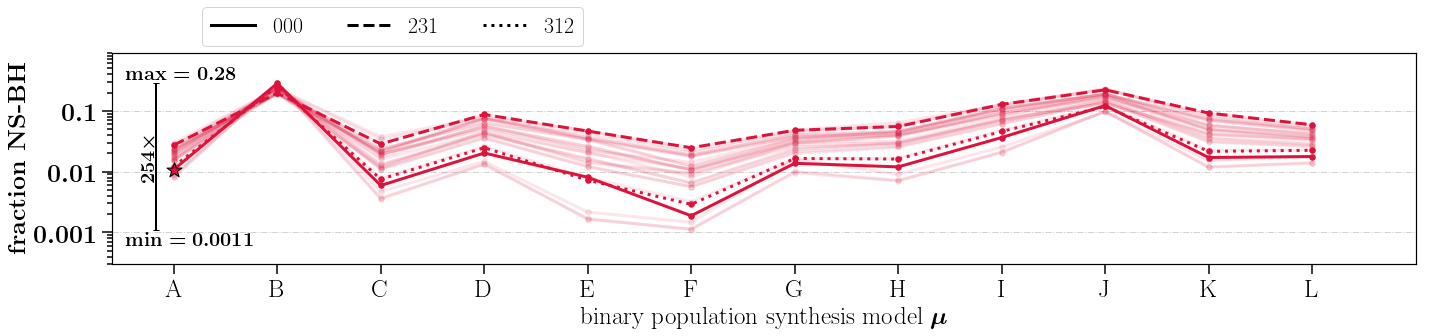

In [1082]:
ylims =[[0,0],[0.03,90],[0,0]]
plotRatesNSBH(whichRate='observed')

('the intrinsic fiducial rate =', 37.343646073393614)
('the intrinsic fiducial rate =', 0.7601084192680709)
('the fiducial ratio =', 2.0354424358408556)


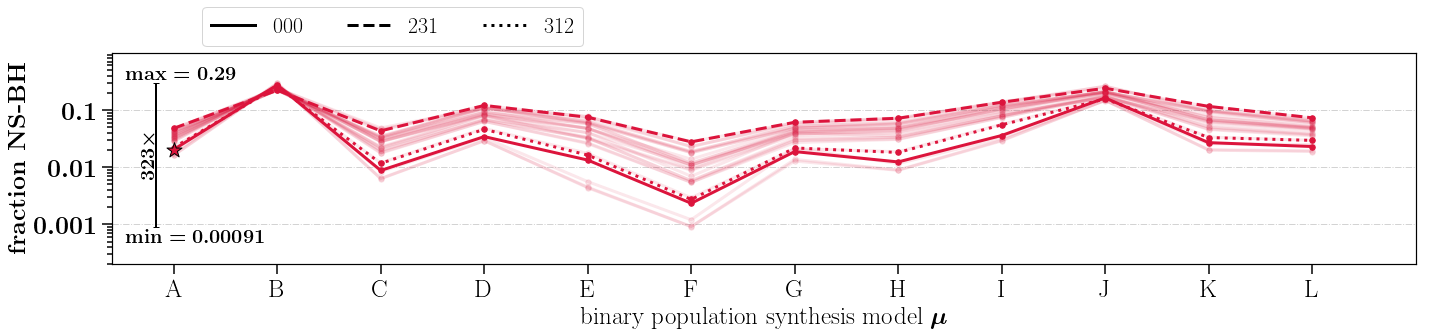

In [1084]:
ylims =[[],[0.02,100],[]]
plotRatesNSBH(whichRate='intrinsic')

In [729]:
print(MSSFRnameslist)

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']


In [352]:
# namesEMlist=[]

# DCOname ='BHNS'
# iii=0
# for ind_chi, chi in enumerate([0.0, 0.5]):
#     # print(chi)
#     iii+=1
#     BH_chi   = chi 
#     for ind_Rns, NSradii in enumerate([11.5,13.0]):
#         iii+=1
#         Rns = NSradii
#         # if ind_mssfr ==0:
#         # 	# print(chi)
#         stringg = 'Rns_'+ str(NSradii) + 'km_' + 'spinBH_' + str(chi) 
#         namesEMlist.append(stringg)


#         # CREATE PANDAS FILE 
#         nModels=26
#         BPSnameslist = list(string.ascii_uppercase)[0:nModels]

#         NAMES = []

#         for ind_l, L in enumerate(BPSnameslist):
#             str_z0 = str(L + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]')
#             str_obs = str(L + ' observed (design LVK) [yr^{-1}]')
#             NAMES.append(str_z0)
#             NAMES.append(str_obs)


# #         print(NAMES)

#         datas=[]

#         for i in range(len(BPSnameslist)):
#             datas.append(np.zeros_like(MSSFRnameslist))
#             datas.append(np.zeros_like(MSSFRnameslist))

# #         print(MSSFRnameslist)
#         df = pd.DataFrame(data=datas, index=NAMES, columns=MSSFRnameslist).T
#         df.columns =   df.columns.map(unicode)
#         df.index =   df.index.map(unicode)
# #         df.index=MSSFRnameslist
#         df.index.names = ['xyz']
#         df.columns.names = ['m']
        
#         df.to_csv('rates_MSSFR_Models_'+DCOname+ '_' + stringg + '.csv')

In [437]:
# print(MSSFRnameslistCSV)

In [438]:
# print(df)

In [439]:
# df = pd.read_csv('rates_MSSFR_Models_'+DCOname+ '_' + stringg + '.csv', header=0, index_col=0).T
# # print(df['111'])
# df.columns =   df.columns.map(unicode)
# df.index =   df.index.map(unicode)
# # df.index= df.index.map(str)
# print(df)
# # print(df['A intrinsic (z=0) [Gpc^{-3} yr^{-1}]'])

In [1137]:
def plotRatesNSBHabs(whichRate='intrinsic'):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
    EMColours = ['#66c2a5',  'crimson', 'gold', 'k']
    
    nrDATAready = 12
    nModels=12
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100
    
    iii=0
    namesEMlist =['BHNS', 'NSBH']

    ind_t = 1
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_EM, EMtype in enumerate(namesEMlist):
            if ind_EM ==0:
                sss = TypesLabels[ind_t]+ '_' + 'AllDCOsimulation'
            else:
                sss = TypesLabels[ind_t]+ '_' + 'NSBH'
            
            ind_t = 1
            df_name = 'rates_MSSFR_Models_' + sss + '.csv' 
            df = pd.read_csv('rates_MSSFR_Models_' + sss+'.csv', index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][:nModels]
    #                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate =',rates[0]) 

                ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
#                 ylabel = r'percentage'

            elif whichRate=='observed':
                rates = rates_L[1::2][:nModels]
                if ind_L==0:
                    print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'




            if EMtype=='BHNS':
                rates_BHNS = rates
            elif EMtype==namesEMlist[1]:
                rates_NSBH = rates
#                 print(namesEMlist[1])
                

#                 print(namesEMlist[4])
                
        # normalize s.t. BBH is always 100
#         print(rates_BBH)
        rates_NSBH = rates_NSBH 

#         print(rates_13_5)
#         rates_BNS = rates_BNS * (100./rates_BH)
#         if ind_L==0:
#             print('fiducial BHNS ratio = ', rates_BHNS[0])
#             print('fiducial NSNS ratio = ', rates_BNS[0])
#             print('per 50 BHBHs:')
#             print('fiducial BHNS ratio = ', rates_BHNS[0]/2)
#             print('fiducial NSNS ratio = ', rates_BNS[0]/2)
        
#         maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
#         maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
#         minRatio_BHNS = np.min(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
#         minRatio_BNS  = np.min(np.concatenate(([maxRatio_BNS], rates_BNS)))
            
        if ind_L==0:
            COLOR='crimson'
            zorder = 100
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[0]
            ALPHA=1
        elif ind_L in [20]:#[1]:
            COLOR='teal'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls=MSSFRlinestyles[1]
            ALPHA=1
        elif ind_L in [6]: #[2]:
            COLOR='c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
#         elif ind_L in [7]:
#             zorder=10
#             COLOR='gold'
#             label=MSSFRnameslist[ind_L]
#             ls = MSSFRlinestyles[3]
#             ALPHA=1
        else:
            COLOR= 'lightgray' #MSSFRcolors[ind_L]
            zorder=2
            label=None      
            ls = MSSFRlinestyles[0]
            ALPHA=0.1
            
            
#         rates_BHNS = 
        axe.plot(range(len(rates)), rates_BHNS-rates_NSBH, c=EMColours[0], lw=3, zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_BHNS-rates_NSBH, c=EMColours[0], s=30,  zorder=zorder, alpha=ALPHA) 
            
        axe.plot(range(len(rates)), rates_NSBH, c=EMColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_NSBH, c=EMColours[1], s=30,  zorder=zorder, alpha=ALPHA) 
        

        

        axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)
################
        # plot fiducial result with a star
        if ind_L==0:
            axe.scatter(range(len(rates))[0], rates_BHNS[0]-rates_NSBH[0],\
                               c=EMColours[0], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
                
            axe.scatter(range(len(rates))[0], rates_NSBH[0],\
                               c=EMColours[1], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
#             axe.scatter(range(len(rates))[0], rates_BNS[0],\
#                                c=EMColours[2], s=250, label=None, \
#                                zorder=1000, marker='*', edgecolor='black')
            
            
            
            
            
      ################      
            
            
#         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
    # calculate statistics: 
#     minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t)

#     print('mean scatter per MSSFR:')
#     print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
#     meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

#     print('mean scatter per BPS:')
# #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
#     print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
#     meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# #         x = nrDATAready 
#     textt_MSSFR = r'$\langle \sigma_{\rm{.x.y.z}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
#     textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
#     minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])

#     textt_min = r'$\mathcal{R}_{\rm{m,min}} = %.2f $'%minn
#     textt_max = r'$\mathcal{R}_{\rm{m,max}} = %.2f $'%maxx

#     axe.text(0.89, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     axe.text(0.89, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

#     axe.text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
#     axe.text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

#     resN = 20
#     scatterline_x = -0.25 * np.ones(resN)
#     scatterline_y = np.linspace(minn,maxx, resN)
#     axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
#     textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
#     yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
#     axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

    xmin = -0.6
    xmax = nrDATAready +0.5 # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)

    if whichRate=='intrinsic':
        min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
        max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
#         axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.3, color=TypeColours[ind_t], zorder=0)

        # for BHNS plot that its a upper limit
        if ind_t==1:
            axe.scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)

    else:
        for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
            axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

    
#         axe.scatter(np.asarray(range(len(rates)))*1000, rates_BHNS, c='k', s=30, label=label, zorder=zorder, alpha=ALPHA)  
#         # make up axes
    if ind_t ==2:
        xlabel = r'binary population synthesis model $\mu$'
    else:
        xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
    axe.set_yscale('log')


    axe.set_xticks(range(nModels))
    axe.set_xticklabels(BPSnameslist)
#     axe.set_yticks([0.001, 0.1, 1, 10, 100])
#     axe.set_yticklabels([r'$0.01\%$',r'$0.1\%$',r'$1\%$',r'$10\%$',r'$100\%$',])
    
    axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

    axe.text(0.9, 0.4, r'NSBH  ' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    
    axe.text(0.9, 0.88, r'BHNS ' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
# 

    handles, labels = axe.get_legend_handles_labels()
#     mask = [3,7,11,31]
#     [0,1,2,7]
#             mask = [0,1,2,7]
    mask=[2,62, 22]
#             labels=['000', '111', '211', '113']
#     labels = ['000',  '231', '312']
    labels = np.asarray(labels)[mask]
    lgd = axe.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
             bbox_to_anchor=(.37, 1.31),  markerscale=2., scatterpoints=1) # loc = 'upper center')        

    
#     print('NSNS ratio in = [', minRatio_BNS, ' , ', maxRatio_BNS, ']')
#     print('BHNS ratio in = [', minRatio_BHNS, ' , ', maxRatio_BHNS, ']')
#     print('per 50 BHBHs:')
#     print('NSNS ratio in = [', minRatio_BNS/2, ' , ', maxRatio_BNS/2, ']')
#     print('BHNS ratio in = [', minRatio_BHNS/2, ' , ', maxRatio_BHNS/2, ']')    
    
    plt.tight_layout()
#     plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
    plt.savefig('./NSBHRatios_' +whichRate + 'Absolute.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




('the intrinsic fiducial rate =', 37.343646073393614)
('the intrinsic fiducial rate =', 0.7601084192680709)


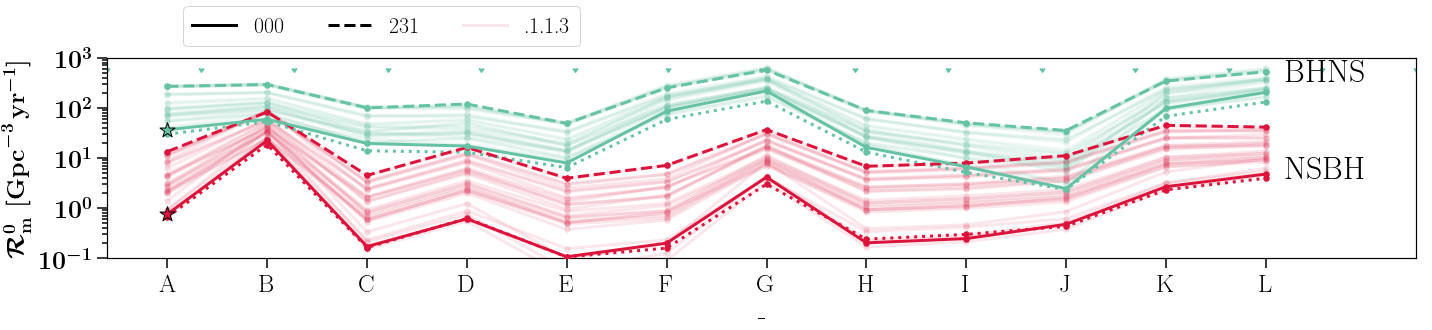

In [1138]:
ylims =[[],[0.1,1000],[]]
plotRatesNSBHabs(whichRate='intrinsic')

('the observed fiducial rate =', 9.331220849069377)
('the observed fiducial rate =', 0.10121206752861203)


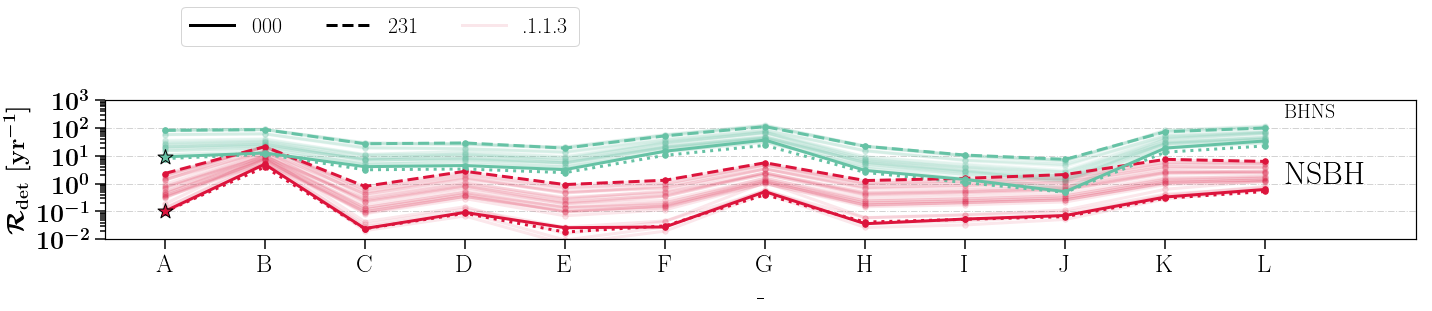

In [1136]:
ylims =[[],[0.01,1000],[]]
plotRatesNSBHabs(whichRate='observed')